In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('dataset/preprocessed_data.csv',low_memory=False)

In [3]:
df.shape

(372541, 38)

- Target variable

In [4]:
df['loanStatus'].value_counts()

loanStatus
0.0    251922
1.0    120619
Name: count, dtype: int64

In [5]:
df.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'FirstPaymentDate', 'VerificationType', 'LanguageCode', 'Age', 'Gender',
       'Country', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration',
       'MonthlyPayment', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'Rating', 'Restructured', 'CreditScoreEsMicroL',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'loanStatus'],
      dtype='object')

## most of the loans are not defaulted (not accepted)

In [6]:
df.head()

BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                  11.0      0.0        88.0              False   
1                   0.0      0.0         0.0              False   
2                   0.0      0.0         0.0              False   
3                 817.5      5.0         5.0              False   
4                   0.0      0.0         0.0              False   

  FirstPaymentDate              VerificationType LanguageCode   Age Gender  \
0       2022-10-07  Income and expenses verified     Estonian  27.0  Woman   
1       2023-06-05  Income and expenses verified      Finnish  35.0  Woman   
2       2024-02-23  Income and expenses verified     Estonian  23.0   Male   
3       2016-05-12  Income and expenses verified     Estonian  53.0  Woman   
4       2023-10-04  Income and expenses verified      Finnish  43.0   Male   

   Country  AppliedAmount  Amount  Interest  LoanDuration  MonthlyPayment  \
0  Estonia         3189.0  3189.0     35.48          60.0          115.34   
1  Finland         4146.0  4146.0     19.86          60.0          108.17   
2  Estonia          531.0   531.0     19.52          60.0           15.25   
3  Estonia         2125.0  2125.0     20.97          60.0           62.05   
4  Finland          414.0   414.0     19.89          96.0            6.65   

              Education MaritalStatus EmploymentStatus  \
0  Vocational education           NaN              NaN   
1      Higher education           NaN              NaN   
2      Higher education           NaN              NaN   
3   Secondary Education    Cohabitant          Retiree   
4  Vocational education           NaN              NaN   

  EmploymentDurationCurrentEmployer OccupationArea  \
0                        UpTo5Years            NaN   
1                        UpTo5Years            NaN   
2                        UpTo5Years            NaN   
3                    MoreThan5Years          Other   
4                             Other            NaN   

                HomeOwnershipType  IncomeTotal  ExistingLiabilities  \
0                           Other        900.0                  0.0   
1                           Owner       3100.0                  0.0   
2  Tenant, pre-furnished property       1700.0                  0.0   
3                           Owner        354.0                  8.0   
4  Tenant, pre-furnished property       1200.0                  0.0   

   LiabilitiesTotal  DebtToIncome  FreeCash  MonthlyPaymentDay Rating  \
0              0.00          0.00      0.00                7.0      D   
1              0.00          0.00      0.00                3.0      B   
2              0.00          0.00      0.00               23.0      B   
3            485.09         26.29     10.92               12.0      C   
4              0.00          0.00      0.00                4.0      D   

   Restructured CreditScoreEsMicroL  PrincipalPaymentsMade  \
0         False                   M                 721.65   
1          True                   M                 272.34   
2         False                   M                   5.52   
3         False                 NaN                1026.77   
4         False                   M                   9.05   

   InterestAndPenaltyPaymentsMade  PrincipalBalance  \
0                       1330.8600           2467.35   
1                        493.8575           3873.66   
2                          5.0700            525.48   
3                       1187.9100              0.00   
4                         32.9175            404.95   

   NoOfPreviousLoansBeforeLoan  AmountOfPreviousLoansBeforeLoan  \
0                          1.0                           3402.0   
1                          1.0                            518.0   
2                          3.0                           1593.0   
3                          1.0                            500.0   
4                          5.0                          11198.0   

   PreviousRepayments

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372541 entries, 0 to 372540
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   BidsPortfolioManager                    372541 non-null  float64
 1   BidsApi                                 372541 non-null  float64
 2   BidsManual                              372541 non-null  float64
 3   NewCreditCustomer                       372541 non-null  bool   
 4   FirstPaymentDate                        372541 non-null  object 
 5   VerificationType                        372491 non-null  object 
 6   LanguageCode                            372541 non-null  object 
 7   Age                                     372541 non-null  float64
 8   Gender                                  372496 non-null  object 
 9   Country                                 372541 non-null  object 
 10  AppliedAmount                           3725

In [8]:
df.describe().T

count         mean          std  \
BidsPortfolioManager                    372541.0   218.139448   288.860563   
BidsApi                                 372541.0     1.157124     1.911900   
BidsManual                              372541.0   162.274835   223.799458   
Age                                     372541.0    40.421379    12.184038   
AppliedAmount                           372541.0  2612.608830  2035.904074   
Amount                                  372541.0  2543.198571  1966.766573   
Interest                                372541.0    25.773949    11.443833   
LoanDuration                            372541.0    49.658024    17.207987   
MonthlyPayment                          365851.0    98.773856    92.852001   
IncomeTotal                             372541.0  1814.006315   972.989424   
ExistingLiabilities                     372541.0     2.450627     2.341835   
LiabilitiesTotal                        372541.0   332.289857   338.841868   
DebtToIncome                            372491.0     2.804925    10.458214   
FreeCash                                372491.0    44.133162   420.208596   
MonthlyPaymentDay                       372541.0    11.329172     7.244694   
PrincipalPaymentsMade                   372541.0  1046.053551  1168.718335   
InterestAndPenaltyPaymentsMade          372541.0   455.323556   505.292235   
PrincipalBalance                        372541.0  1252.825900  1558.295902   
NoOfPreviousLoansBeforeLoan             372528.0     1.811464     2.850682   
AmountOfPreviousLoansBeforeLoan         372528.0  3757.648105  5605.351335   
PreviousRepaymentsBeforeLoan            230537.0  1180.613137  1913.887941   
PreviousEarlyRepaymentsCountBeforeLoan  372528.0     0.045809     0.305743   
loanStatus                              372541.0     0.323774     0.467915   

                                            min      25%      50%        75%  \
BidsPortfolioManager                       0.00     0.00    76.00   327.0000   
BidsApi                                    0.00     0.00     0.00     2.0000   
BidsManual                                 0.00     0.00    41.00   255.6465   
Age                                        4.00    31.00    39.00    49.0000   
AppliedAmount                             10.00   829.00  2126.00  4146.0000   
Amount                                     6.39   829.00  2125.00  4146.0000   
Interest                                   2.00    18.88    21.00    32.6000   
LoanDuration                               1.00    36.00    60.00    60.0000   
MonthlyPayment                             0.00    33.37    85.89   118.8100   
IncomeTotal                                0.00  1053.00  1600.00  2400.0000   
ExistingLiabilities                        0.00     1.00     2.00     4.0000   
LiabilitiesTotal                           0.00    48.06   238.62   500.0000   
DebtToIncome                               0.00     0.00     0.00     0.0000   
FreeCash                               -2332.00     0.00     0.00     0.0000   
MonthlyPaymentDay                          0.00     4.00    11.00    17.0000   
PrincipalPaymentsMade                      0.00   165.62   530.00  1554.0000   
InterestAndPenaltyPaymentsMade             0.00    63.46   244.07   686.2300   
PrincipalBalance                        -472.59     0.00   491.16  2202.6400   
NoOfPreviousLoansBeforeLoan                0.00     0.00     1.00     2.0000   
AmountOfPreviousLoansBeforeLoan            0.00     0.00  1060.00  5528.0000   
PreviousRepaymentsBeforeLoan               0.00   136.09   514.75  1294.5000   
PreviousEarlyRepaymentsCountBeforeLoan     0.00     0.00     0.00     0.0000   
loanStatus                                 0.00     0.00     0.00     1.0000   

                                                 max  
BidsPortfolioManager                       817.50000  
BidsApi                                      5.00000  
BidsManual                                 639.11625  
Age                          

## data values seems to be reosanable ie: no outliers

## Visualizing missing values


<Axes: >

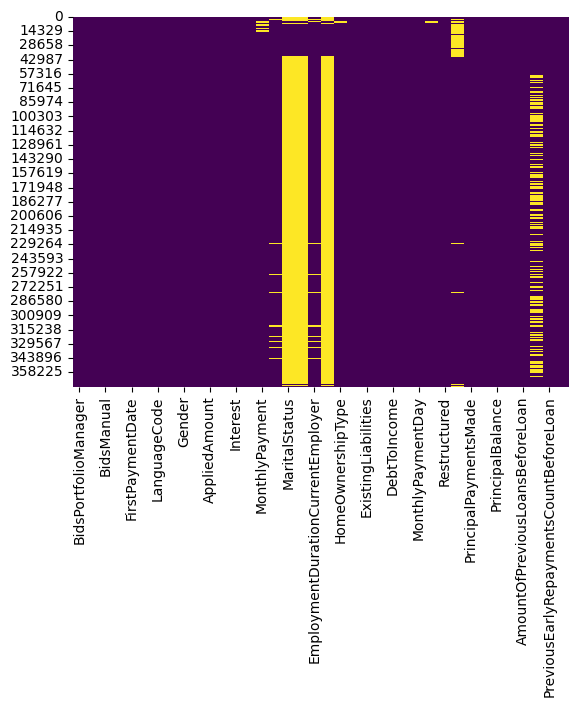

In [9]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [10]:
df.isnull().sum()

BidsPortfolioManager                           0
BidsApi                                        0
BidsManual                                     0
NewCreditCustomer                              0
FirstPaymentDate                               0
VerificationType                              50
LanguageCode                                   0
Age                                            0
Gender                                        45
Country                                        0
AppliedAmount                                  0
Amount                                         0
Interest                                       0
LoanDuration                                   0
MonthlyPayment                              6690
Education                                  10732
MaritalStatus                             336011
EmploymentStatus                          336187
EmploymentDurationCurrentEmployer          10896
OccupationArea                            336106
HomeOwnershipType   

## Imputing missing values more than 5% other than that we Drop them

In [11]:
df['VerificationType'].isnull().sum()

50

In [12]:
missing_categorical=['VerificationType','Gender','Education','EmploymentDurationCurrentEmployer',
                     'HomeOwnershipType','Rating','CreditScoreEsMicroL']
missing_numerical=['MonthlyPayment','DebtToIncome','FreeCash','PreviousRepaymentsBeforeLoan']

In [13]:
df['CreditScoreEsMicroL']=df['CreditScoreEsMicroL'].fillna(df['CreditScoreEsMicroL'].mode())

In [14]:
for col in missing_categorical:
    df[col]= df[col].interpolate('ffill')
    df[col]= df[col].interpolate('bfill')
    
    
for col in missing_numerical:
    mean=df[col].mean()
    print(mean)
    df[col].fillna(mean,inplace=True)

98.7738557226849
2.8049251122845913
44.13316222405373
1180.613136994062


In [15]:
df.isnull().sum()

BidsPortfolioManager                           0
BidsApi                                        0
BidsManual                                     0
NewCreditCustomer                              0
FirstPaymentDate                               0
VerificationType                               0
LanguageCode                                   0
Age                                            0
Gender                                         0
Country                                        0
AppliedAmount                                  0
Amount                                         0
Interest                                       0
LoanDuration                                   0
MonthlyPayment                                 0
Education                                      0
MaritalStatus                             336011
EmploymentStatus                          336187
EmploymentDurationCurrentEmployer              0
OccupationArea                            336106
HomeOwnershipType   

## we can notice that some values contains alot of null values but we will need this columns for answering some of our questions so we will not drop them until we are finished with EDA step and start modelling part

### some additional Data Processing

In [16]:
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
# Convert date to datetime and extract features
df_copy['FirstPaymentDate'] = pd.to_datetime(df_copy['FirstPaymentDate'])
df_copy['Year'] = df_copy['FirstPaymentDate'].dt.year
df_copy['Month'] = df_copy['FirstPaymentDate'].dt.month
df_copy['Day'] = df_copy['FirstPaymentDate'].dt.day

# Drop the original date column
df_copy.drop('FirstPaymentDate', axis=1, inplace=True)

# Convert categorical variables to numerical form using label encoding
le = LabelEncoder()

categorical_cols = df_copy.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_copy[col] = le.fit_transform(df_copy[col])

<Axes: >

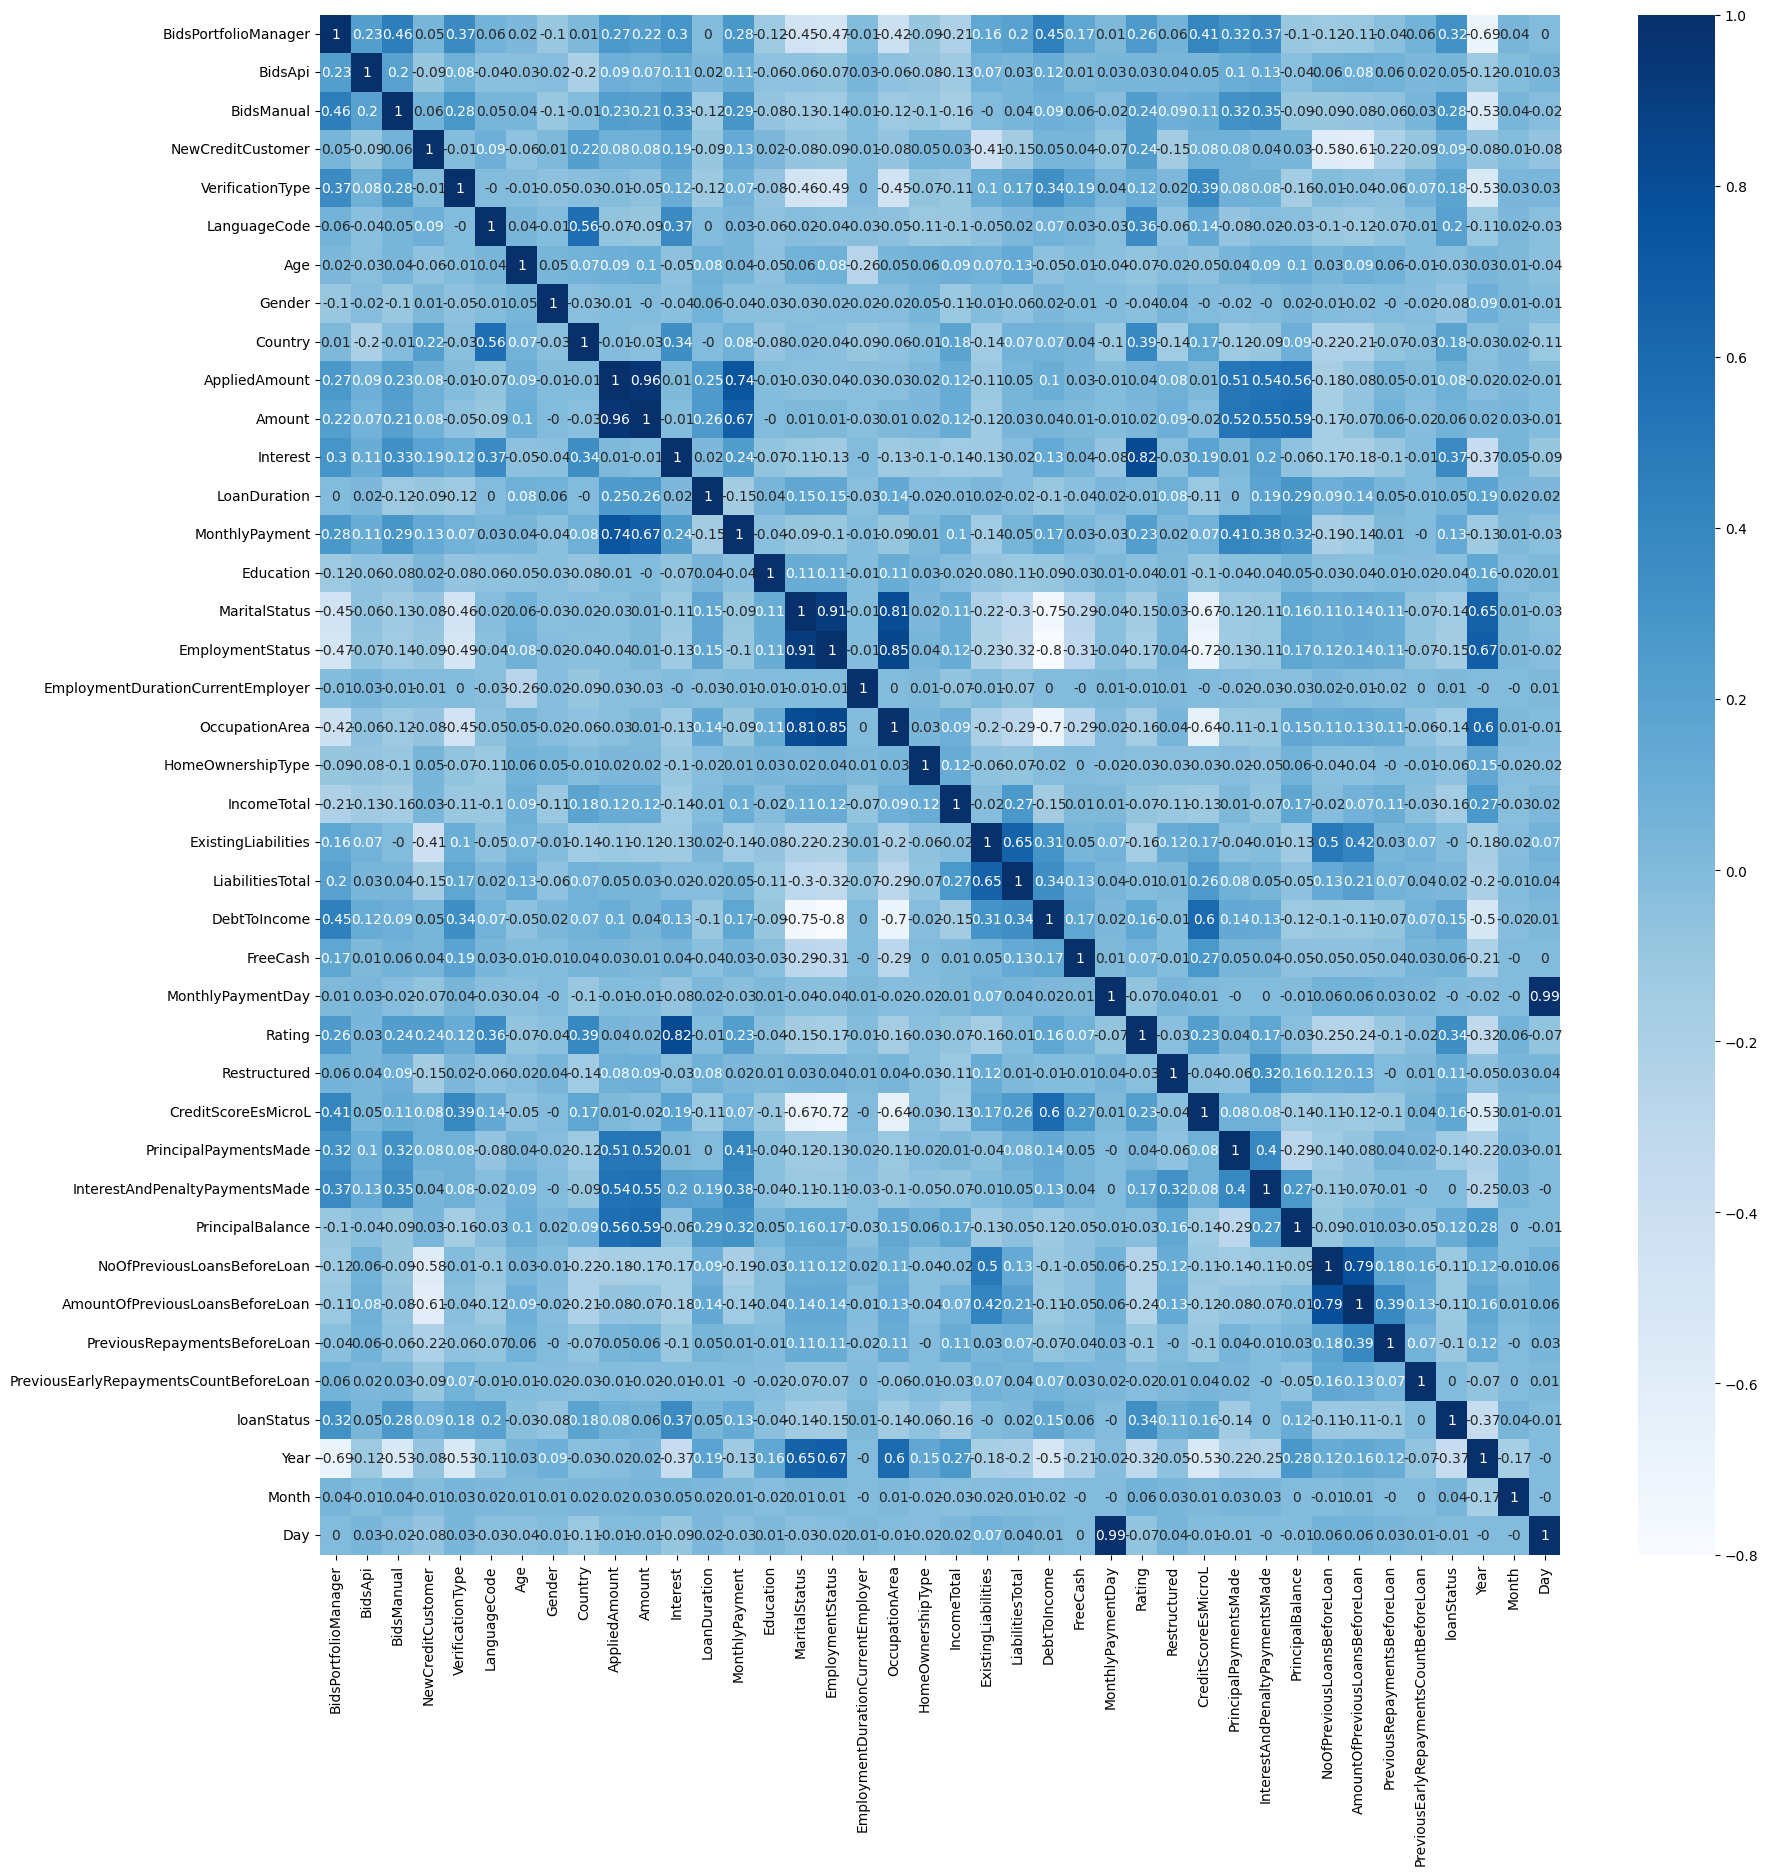

In [17]:
# create a heatmap to show the correlation between the features
plt.figure(figsize=(20,20))
sns.heatmap(df_copy.corr().round(decimals=2),cbar=True,annot=True,cmap='Blues')

## most of data are not correlated so i will not drop any columns even if correlation is 90% we will still lose some information

Text(0, 0.5, 'Loans Count')

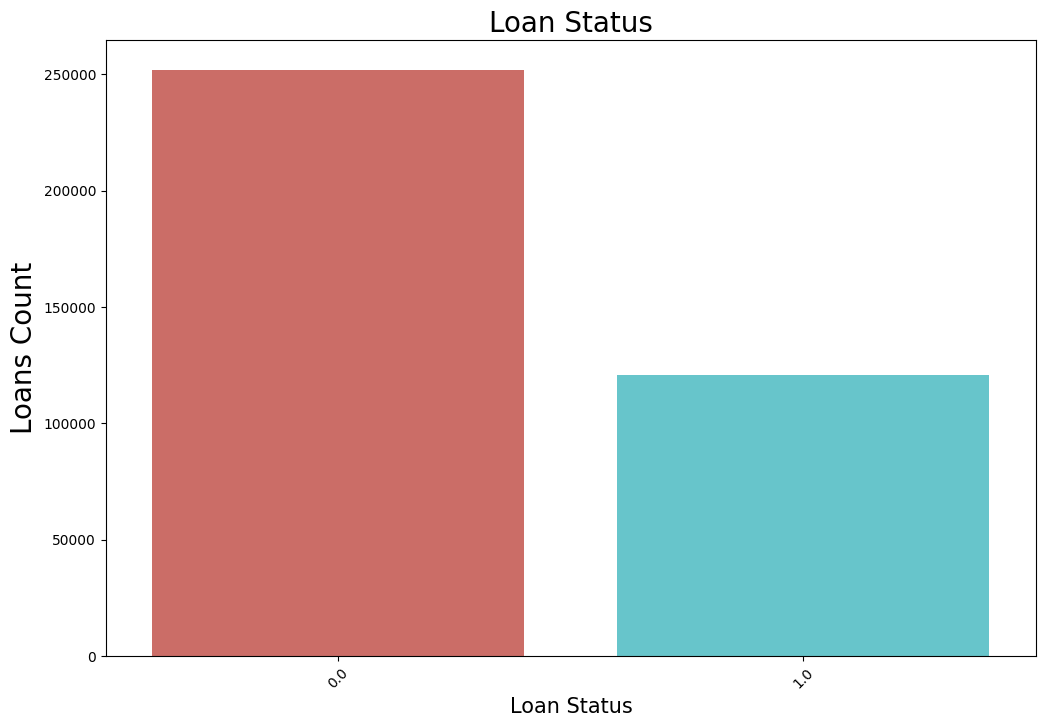

In [18]:
# Loan Status
plt.figure(figsize = (12,8))
g = sns.countplot(x="loanStatus",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Loan Status", fontsize=20)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Loans Count", fontsize=20)

## How does the Age affect the loan amount 

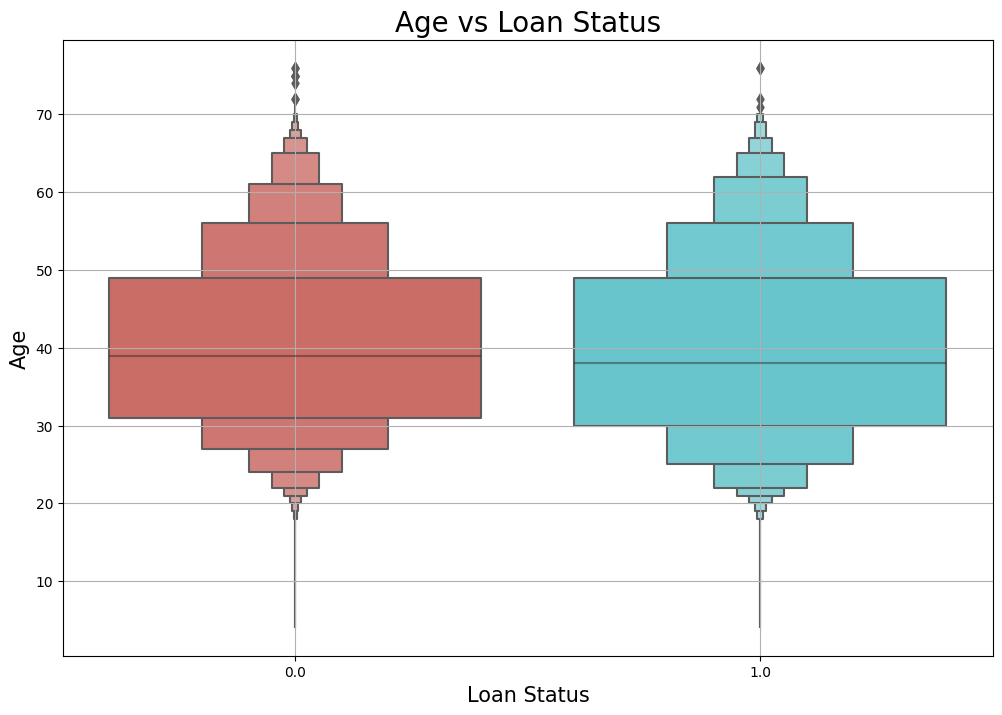

In [19]:
plt.figure(figsize=(12,8))
sns.boxenplot(x='loanStatus',y='Age',data=df,palette='hls')
plt.title('Age vs Loan Status', fontsize=20)
plt.xlabel('Loan Status', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.grid(True)
plt.show()


### from the plot we can see that loans are defaulted more at ages between 20 to 48 

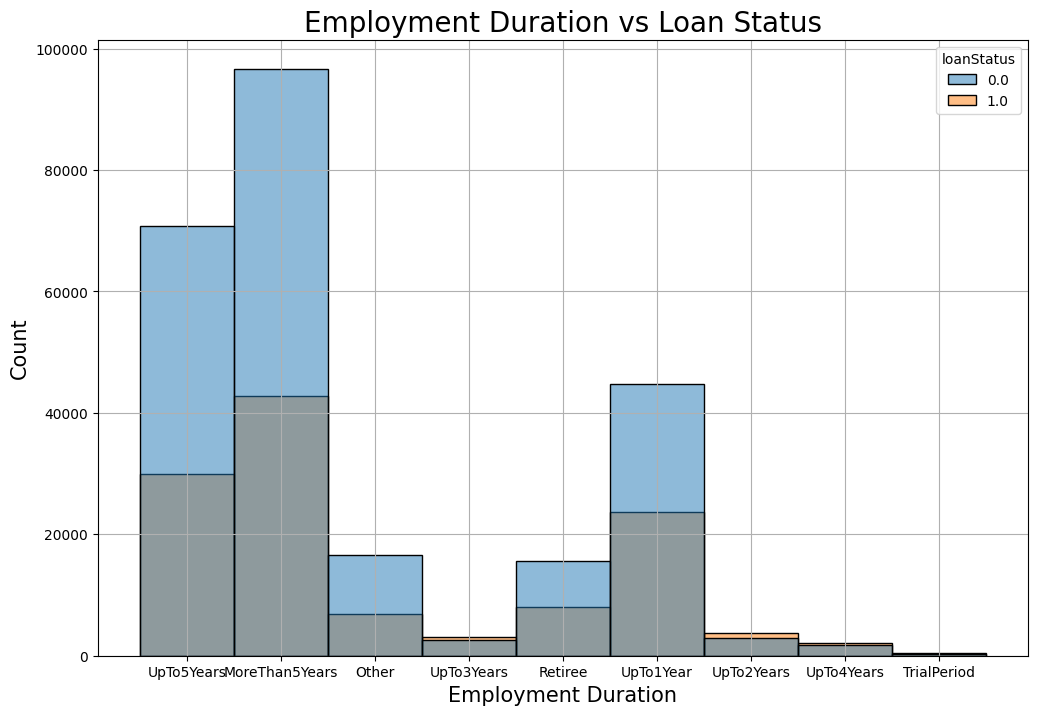

In [20]:
# Loan Status vs Employment Duration histogram show the distribution of Employment Duration for each Loan Status
plt.figure(figsize=(12,8))
sns.histplot(data=df,x='EmploymentDurationCurrentEmployer',hue=df['loanStatus'])
plt.title('Employment Duration vs Loan Status', fontsize=20)
plt.xlabel('Employment Duration', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(True)
plt.show()

### more than 5 years employment have high acceptance among all employee status but also highest loans rejected while employees up to 3 years and 2 years are most likely their loan be accepted while up to 4 years employment the ratio is 50%/50%


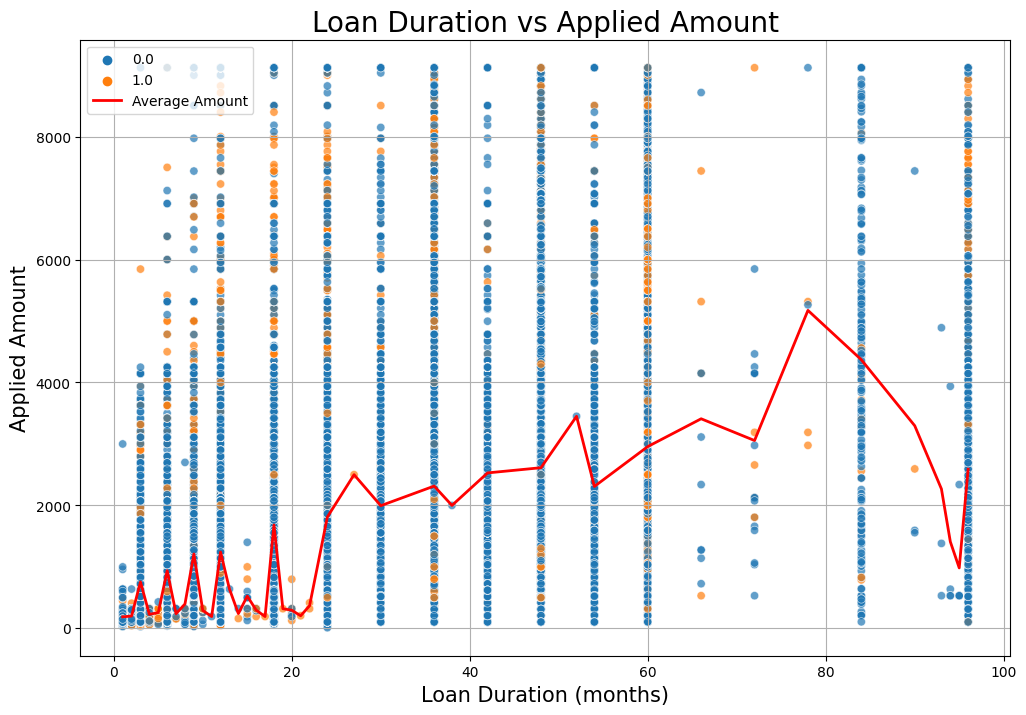

In [21]:
# Calculate average applied amount for each loan duration
avg_amount_by_duration = df.groupby('LoanDuration')['AppliedAmount'].mean().reset_index()

# Plot the scatterplot with average applied amount trend line
plt.figure(figsize=(12,8))
sns.scatterplot(x='LoanDuration', y='AppliedAmount', data=df, hue='loanStatus', alpha=0.7)
sns.lineplot(x='LoanDuration', y='AppliedAmount', data=avg_amount_by_duration, color='red', linewidth=2, label='Average Amount')

# Enhancements to the plot
plt.title('Loan Duration vs Applied Amount', fontsize=20)
plt.xlabel('Loan Duration (months)', fontsize=15)
plt.ylabel('Applied Amount', fontsize=15)
plt.grid(True)
plt.legend()
plt.show()


### most applied amounts are large if loan duration is below 60 months and lower if loan duration are higher than 80 months

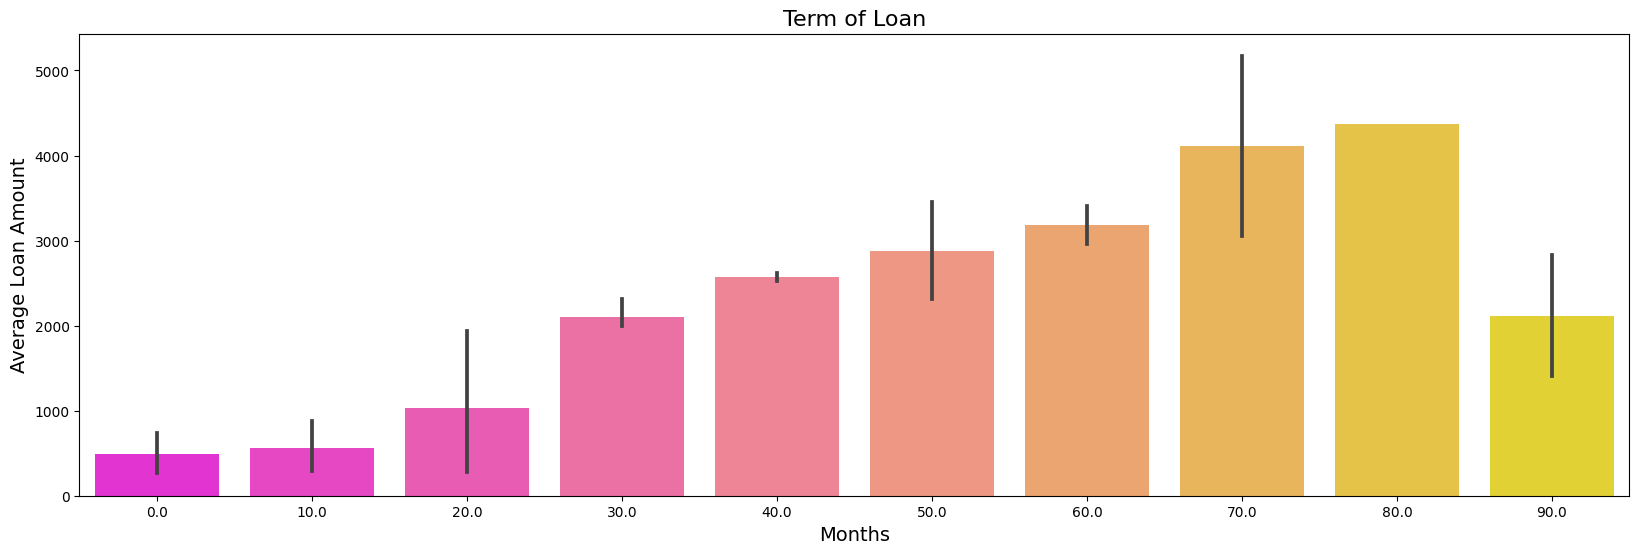

In [22]:
# Calculate average applied amount for each loan duration
avg_amount_by_duration = df.groupby('LoanDuration')['AppliedAmount'].mean().reset_index()

# group loan duration of every 10 months and calculate average applied amount
avg_amount_by_duration['LoanDuration'] = avg_amount_by_duration['LoanDuration'] // 10 * 10

# Bar plot of Term (Loan taken for number of months)
plt.figure(figsize=(20,6))
sns.barplot(x='LoanDuration', y='AppliedAmount', data=avg_amount_by_duration, palette='spring')
plt.title("Term of Loan", fontsize=16)
plt.xlabel("Months", fontsize=14)
plt.ylabel("Average Loan Amount", fontsize=14)
plt.show()

## Reasonable as long as loan duration increase loan amount increase it seems that the period of 70-80 months have the highest loan applied amounts

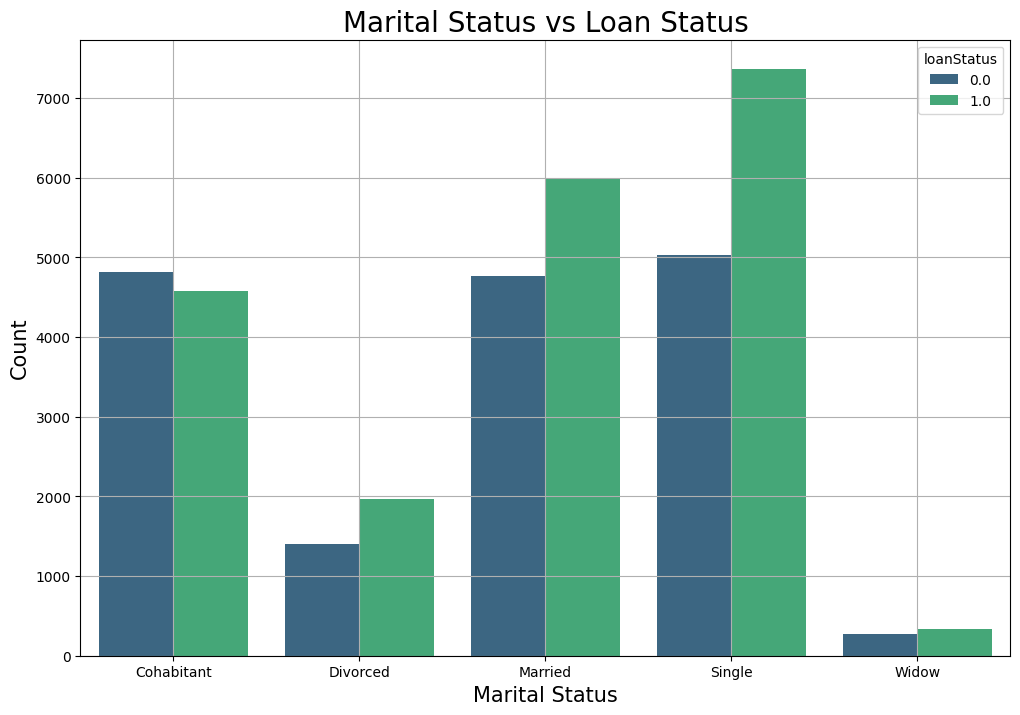

In [23]:
# martial status vs loan status
fig = plt.figure(figsize=(12,8))
sns.countplot(x='MaritalStatus',data=df,hue='loanStatus',palette='viridis')
plt.title('Marital Status vs Loan Status', fontsize=20)
plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(True)
plt.show()
 

### being single is more likely you can to get the loan  we can see it is obvious that if you are single you have high probability to apply for a loan 

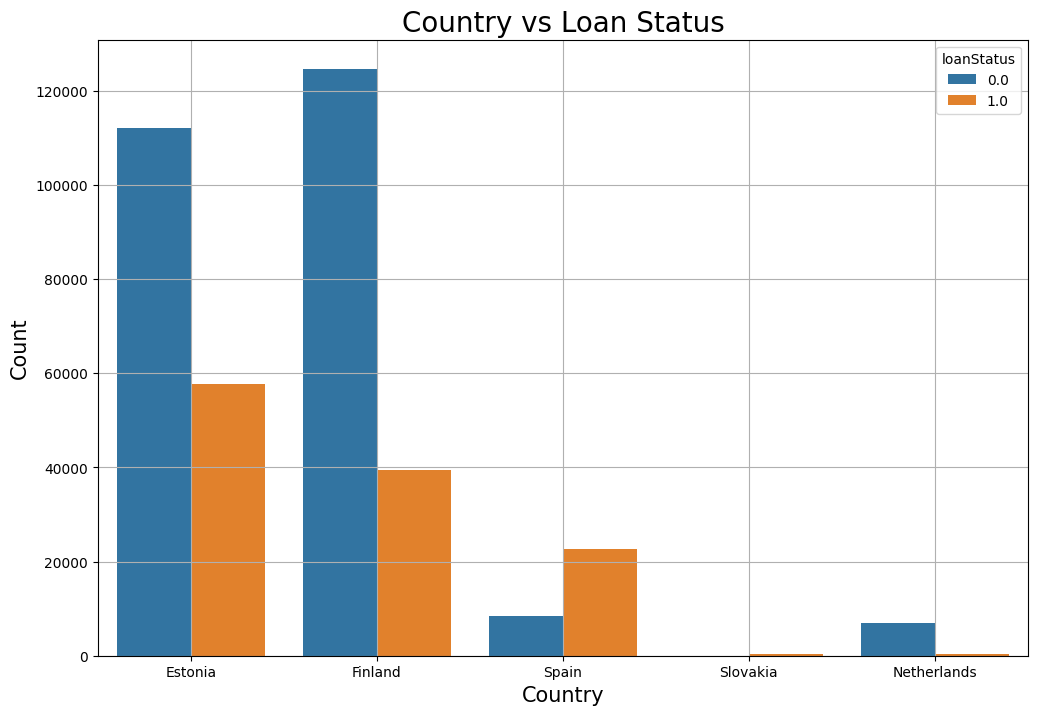

In [24]:
# geospatial analysis of loan status over the country
plt.figure(figsize=(12,8))
sns.countplot(x='Country',data=df,hue='loanStatus')
plt.title('Country vs Loan Status', fontsize=20)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(True)
plt.show()


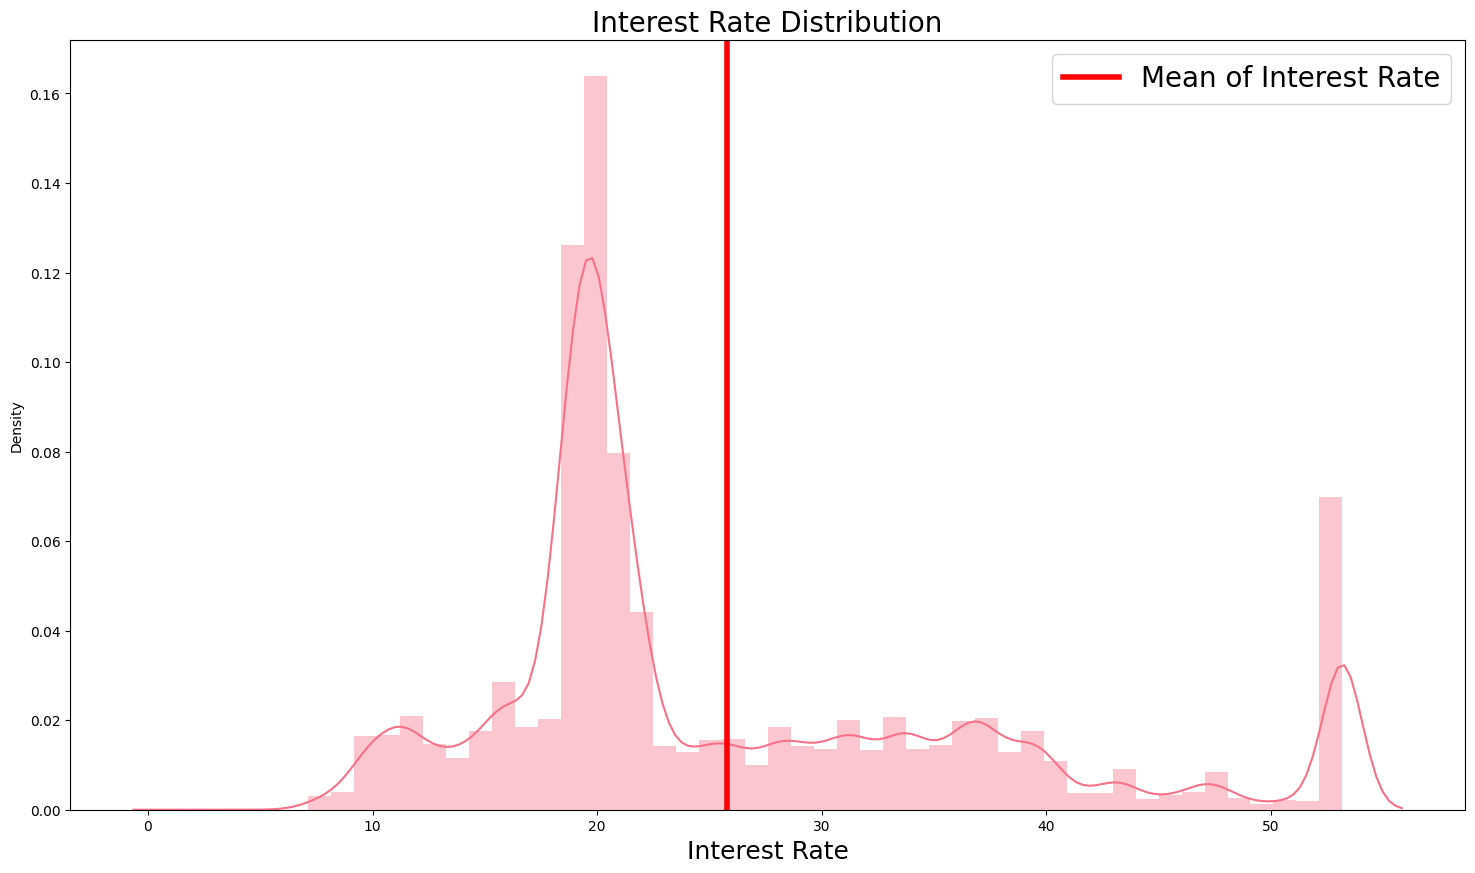

In [62]:
# Set new variable name to include only loans that are defaulted
default_vis = df[df.loanStatus == '1']

# Visualize the distribution of interest rates
sns.set_palette("husl")
plt.figure(figsize=(18,10))
sns.distplot(df['Interest'])
plt.axvline(x=df.Interest.mean(), color='red', linestyle='-', lw=4, label='Mean of Interest Rate')
plt.title('Interest Rate Distribution', fontsize=20)
plt.xlabel('Interest Rate', fontsize=18)
plt.legend(fontsize=20)
plt.show()

### we can see that average interest rate for accepted loans is around 25%

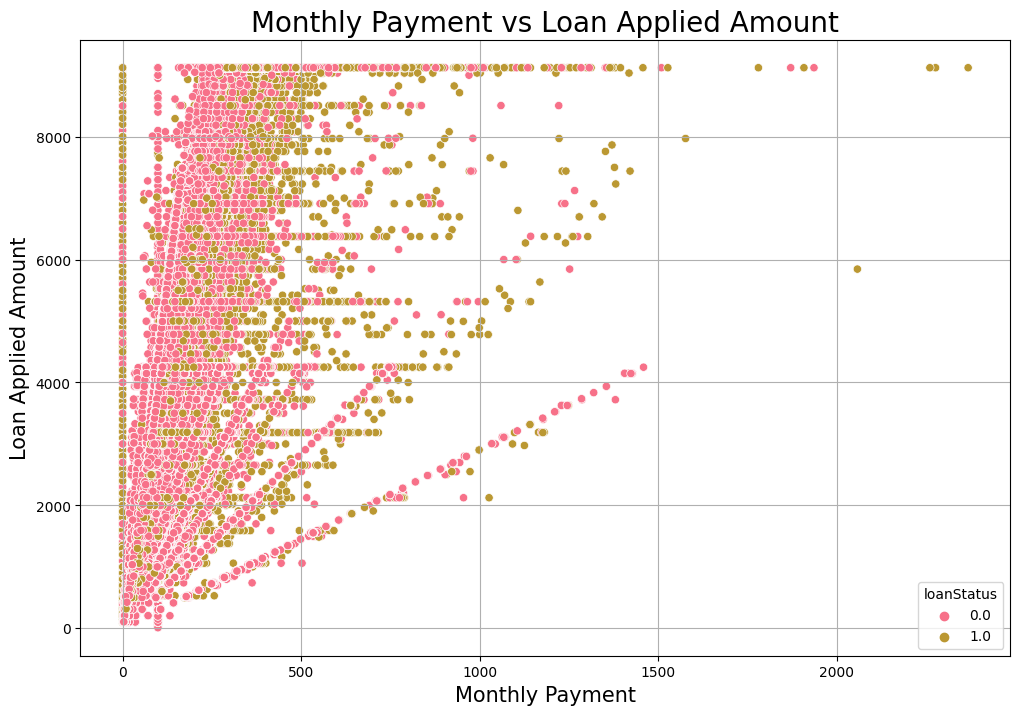

In [26]:
# Monthly Payment vs Loan applied amount and Loan status
plt.figure(figsize=(12,8))
sns.scatterplot(x='MonthlyPayment',y='AppliedAmount',data=df,hue='loanStatus')
plt.title('Monthly Payment vs Loan Applied Amount', fontsize=20)
plt.xlabel('Monthly Payment', fontsize=15)
plt.ylabel('Loan Applied Amount', fontsize=15)
plt.grid(True)
plt.show()


### we can see here that as monthly payment increase with Lan applied amount obviously if you want a bigger loan you should pay more

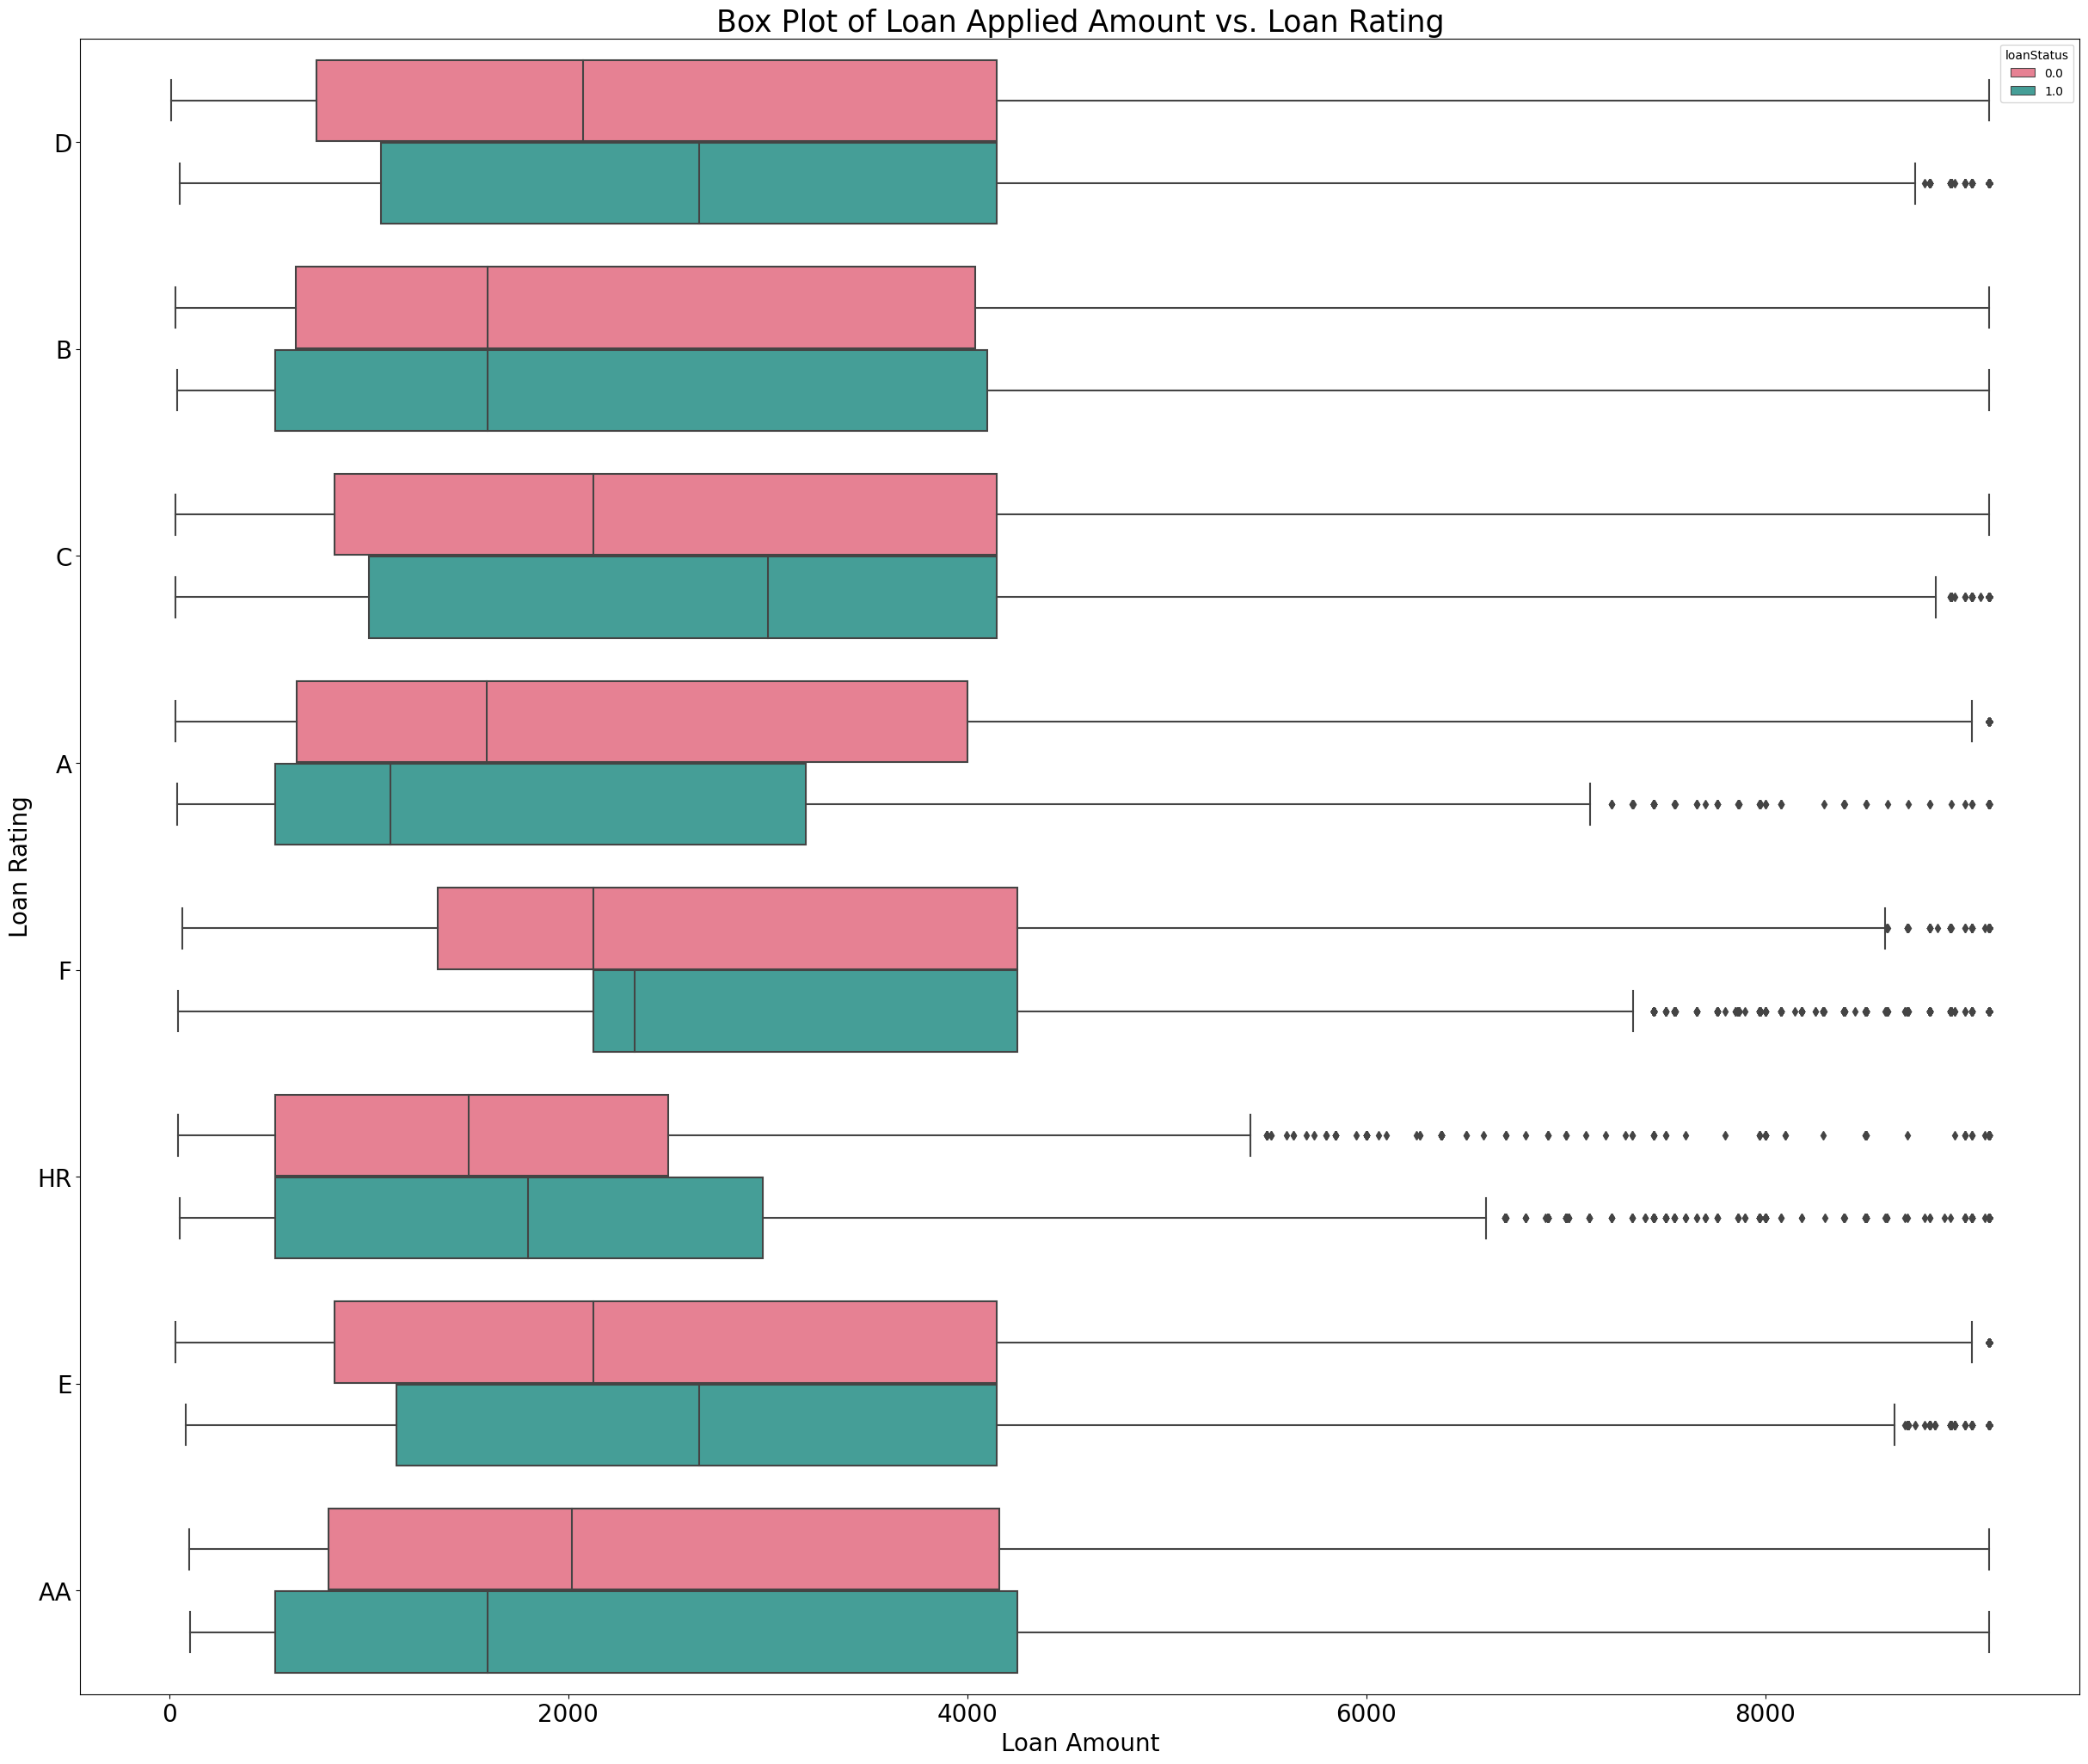

In [27]:
# Plot the borrower's Loan Amount compared to Loan Rating
plt.figure(figsize=(30,25))
sns.boxplot(x="AppliedAmount", y="Rating", data=df, palette="husl",hue='loanStatus')
plt.title('Box Plot of Loan Applied Amount vs. Loan Rating', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Loan Rating', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [28]:
# detect outliers in numerical columns

# Age


In [29]:
df.shape

(372541, 38)

In [30]:
# Step 1: Identify the outlier
outlier = 'M'

# Step 2: Remove the outlier from the dataset
df_no_outlier = df[df['CreditScoreEsMicroL'] != outlier]

# Step 3: Calculate the distribution of the remaining 10 classes
class_distribution = df_no_outlier['CreditScoreEsMicroL'].value_counts(normalize=True)

# Step 4-6: Replace the outlier with a class chosen based on distribution
outlier_indices = df[df['CreditScoreEsMicroL'] == outlier].index
for idx in outlier_indices:
    selected_class = np.random.choice(class_distribution.index, p=class_distribution.values)
    df.at[idx, 'CreditScoreEsMicroL'] = selected_class
    
    
print(df)


        BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                       11.0      0.0        88.0              False   
1                        0.0      0.0         0.0              False   
2                        0.0      0.0         0.0              False   
3                      817.5      5.0         5.0              False   
4                        0.0      0.0         0.0              False   
...                      ...      ...         ...                ...   
372536                   0.0      5.0         0.0              False   
372537                  78.0      0.0        50.0              False   
372538                   0.0      5.0         0.0              False   
372539                   0.0      0.0         0.0              False   
372540                   0.0      1.0         0.0              False   

       FirstPaymentDate              VerificationType LanguageCode   Age  \
0            2022-10-07  Income and expenses verified     E

In [31]:
df.head(100)

BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                   11.0      0.0        88.0              False   
1                    0.0      0.0         0.0              False   
2                    0.0      0.0         0.0              False   
3                  817.5      5.0         5.0              False   
4                    0.0      0.0         0.0              False   
..                   ...      ...         ...                ...   
95                 530.0      0.0         0.0               True   
96                   0.0      0.0         0.0               True   
97                   0.0      0.0         0.0              False   
98                   5.0      0.0         1.0              False   
99                 108.0      3.0        40.0              False   

   FirstPaymentDate              VerificationType LanguageCode   Age Gender  \
0        2022-10-07  Income and expenses verified     Estonian  27.0  Woman   
1        2023-06-05  Income and expenses verified      Finnish  35.0  Woman   
2        2024-02-23  Income and expenses verified     Estonian  23.0   Male   
3        2016-05-12  Income and expenses verified     Estonian  53.0  Woman   
4        2023-10-04  Income and expenses verified      Finnish  43.0   Male   
..              ...                           ...          ...   ...    ...   
95       2016-04-15             Income unverified     Estonian  22.0  Woman   
96       2023-06-06  Income and expenses verified      Finnish  37.0  Woman   
97       2023-04-17  Income and expenses verified      Finnish  58.0  Woman   
98       2023-01-02  Income and expenses verified     Estonian  23.0  Woman   
99       2022-05-02             Income unverified      Russian  36.0   Male   

    Country  AppliedAmount  Amount  Interest  LoanDuration  MonthlyPayment  \
0   Estonia         3189.0  3189.0     35.48          60.0          115.34   
1   Finland         4146.0  4146.0     19.86          60.0          108.17   
2   Estonia          531.0   531.0     19.52          60.0           15.25   
3   Estonia         2125.0  2125.0     20.97          60.0           62.05   
4   Finland          414.0   414.0     19.89          96.0            6.65   
..      ...            ...     ...       ...           ...             ...   
95  Estonia          530.0   530.0     41.81          60.0           22.33   
96  Finland          518.0   518.0     19.86          60.0           13.51   
97  Finland         4146.0  4146.0     19.88          96.0           66.58   
98  Estonia          106.0   106.0     20.60          60.0            3.09   
99  Estonia         2126.0  2126.0     31.90          60.0           78.37   

               Education MaritalStatus EmploymentStatus  \
0   Vocational education           NaN              NaN   
1       Higher education           NaN              NaN   
2       Higher education           NaN              NaN   
3    Secondary Education    Cohabitant          Retiree   
4   Vocational education           NaN              NaN   
..                   ...           ...              ...   
95       Basic education        Single   Fully employed   
96  Vocational education           NaN              NaN   
97      Higher education           NaN              NaN   
98      Higher education           NaN              NaN   
99      Higher education           NaN              NaN   

   EmploymentDurationCurrentEmployer            OccupationArea  \
0                         UpTo5Years                       NaN   
1                         UpTo5Years                       NaN   
2                         UpTo5Years                       NaN   
3                     MoreThan5Years                     Other   
4                              Other                       NaN   
..                               ...                       ...   
95                        UpTo5Years  Hospitality and catering   
96                           Retiree                       NaN  

In [32]:
# destribute credit score outlier 'M' on all other credir scores column
new_credit_score = df['CreditScoreEsMicroL'].replace()
new_credit_score


0         M5
1         M2
2         M1
3         M1
4         M1
          ..
372536    M5
372537    M5
372538    M1
372539    M6
372540    M7
Name: CreditScoreEsMicroL, Length: 372541, dtype: object

In [33]:
new_credit_score.info

<bound method Series.info of 0         M5
1         M2
2         M1
3         M1
4         M1
          ..
372536    M5
372537    M5
372538    M1
372539    M6
372540    M7
Name: CreditScoreEsMicroL, Length: 372541, dtype: object>

In [34]:
df.shape

(372541, 38)

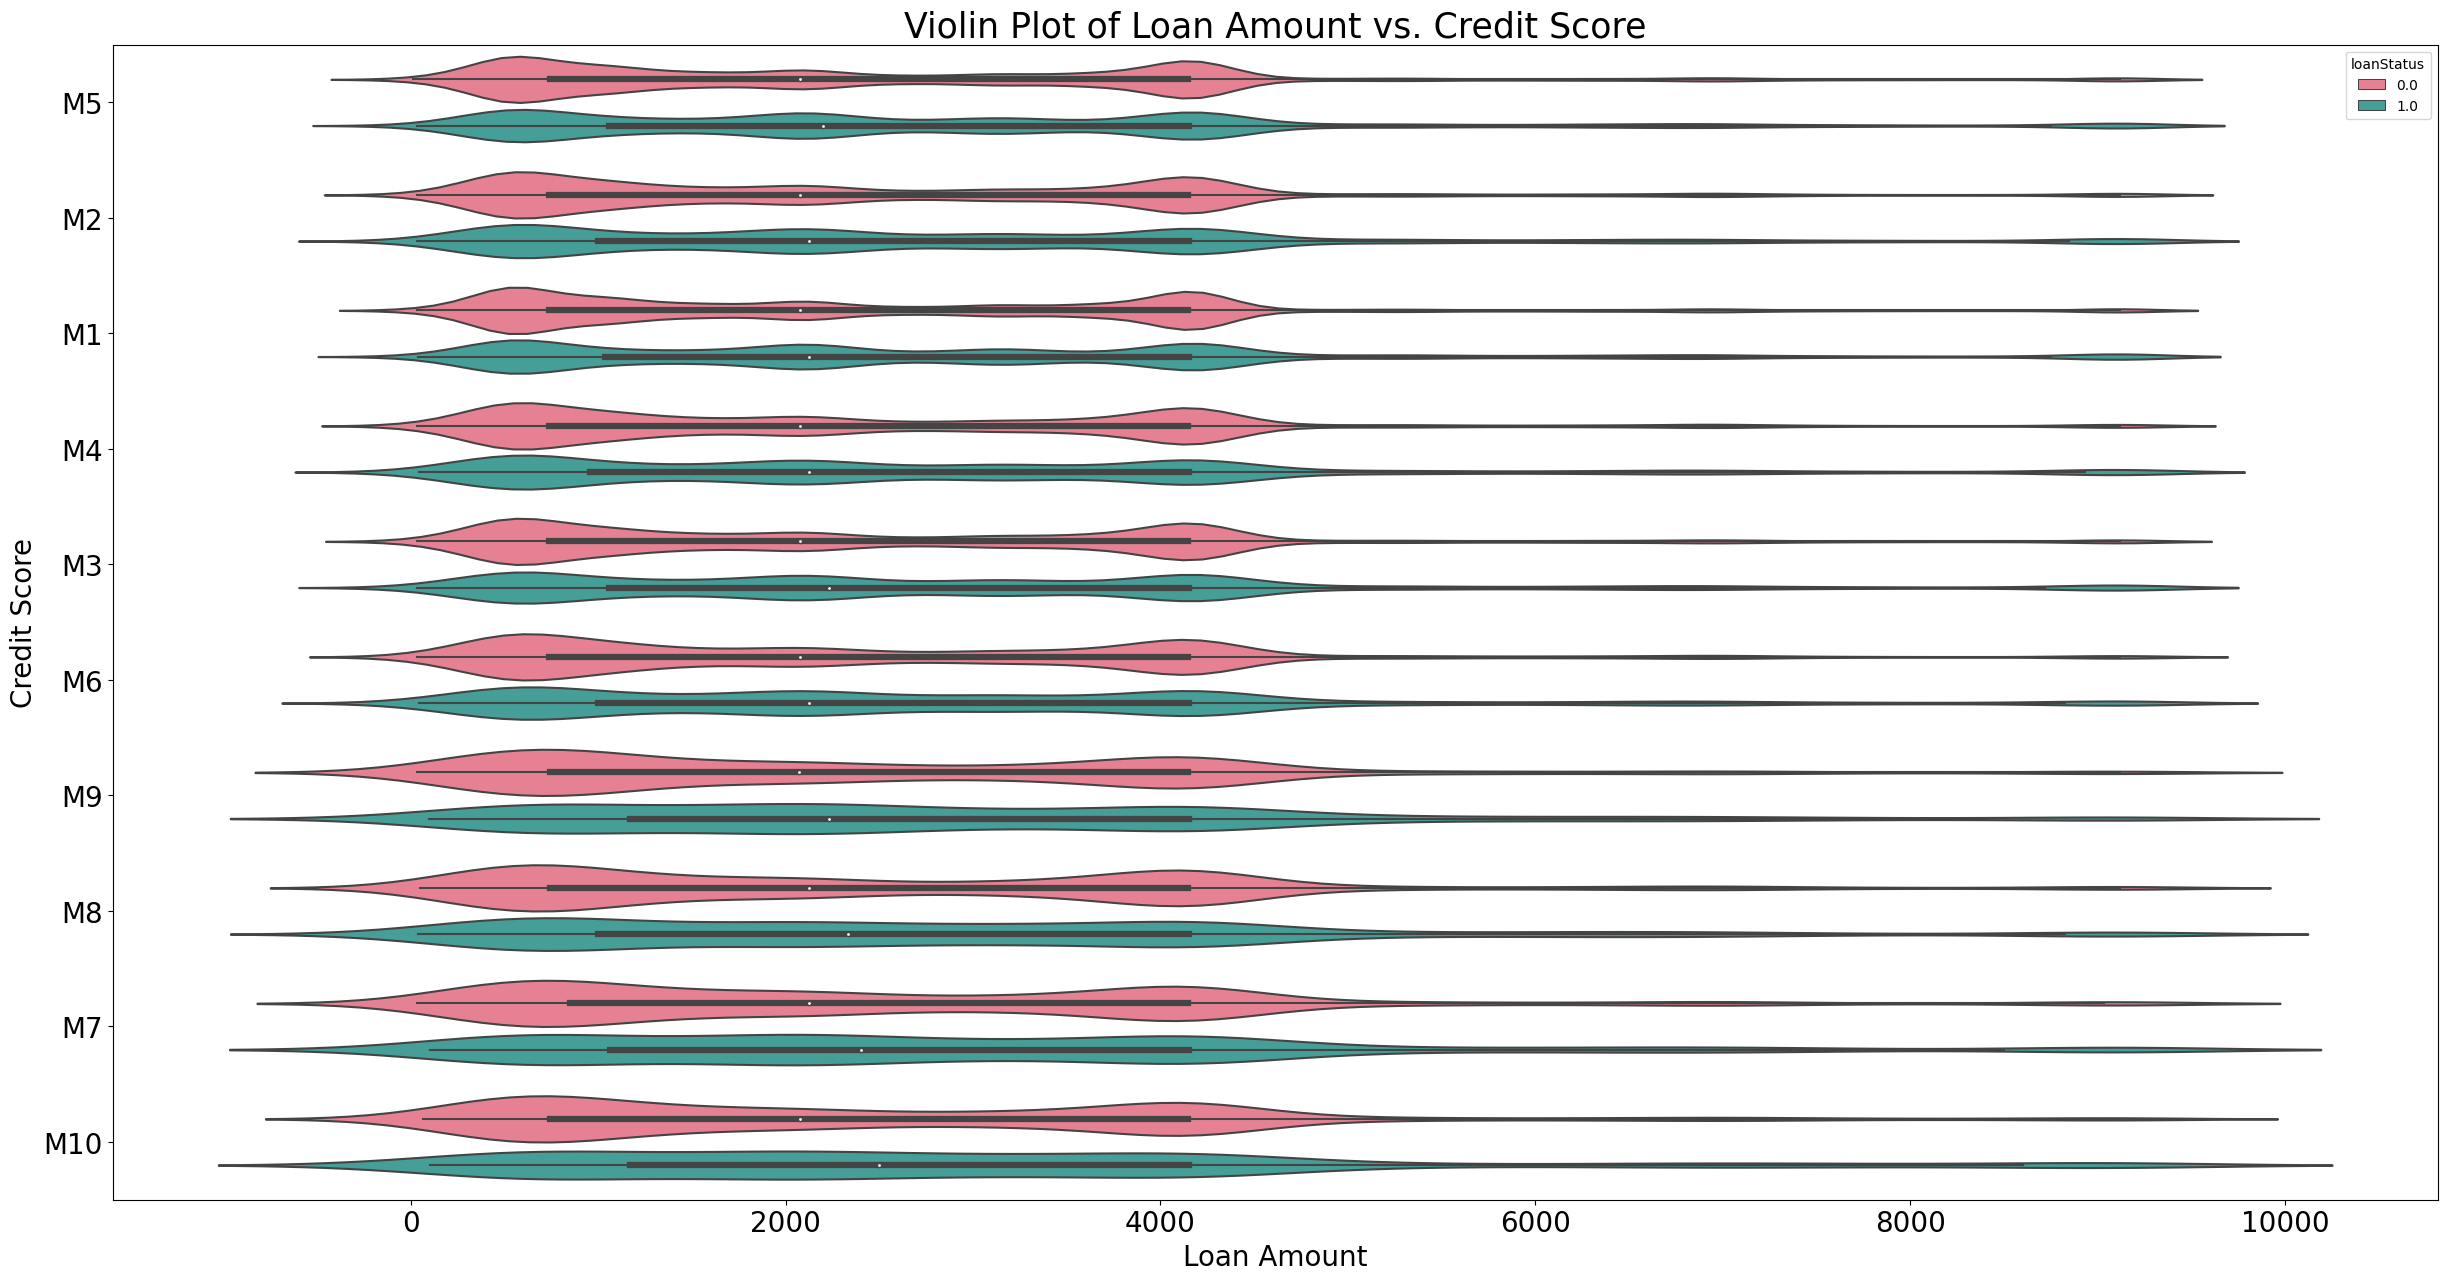

In [35]:
plt.figure(figsize=(30,15))



sns.violinplot(x="AppliedAmount", y="CreditScoreEsMicroL", data=df, palette="husl",hue='loanStatus')
plt.title('Violin Plot of Loan Amount vs. Credit Score', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Credit Score', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [36]:
df.shape

(372541, 38)

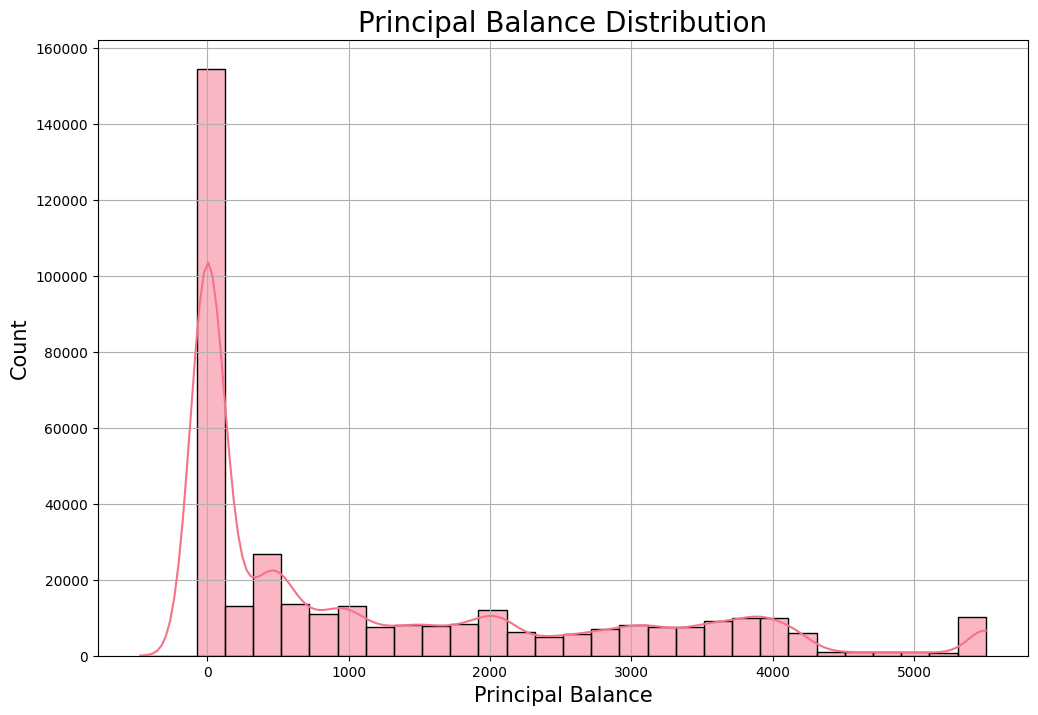

In [37]:
fig = plt.figure(figsize=(12,8))
sns.histplot(df['PrincipalBalance'], bins=30, kde=True)
plt.title('Principal Balance Distribution', fontsize=20)
plt.xlabel('Principal Balance', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(True)
plt.show()

In [38]:
df['PrincipalBalance'] = df['PrincipalBalance'] + -min(df['PrincipalBalance']) + np.random.randint(0, df['PrincipalBalance'].mean(), size=len(df['PrincipalBalance']))

In [39]:
df.shape

(372541, 38)

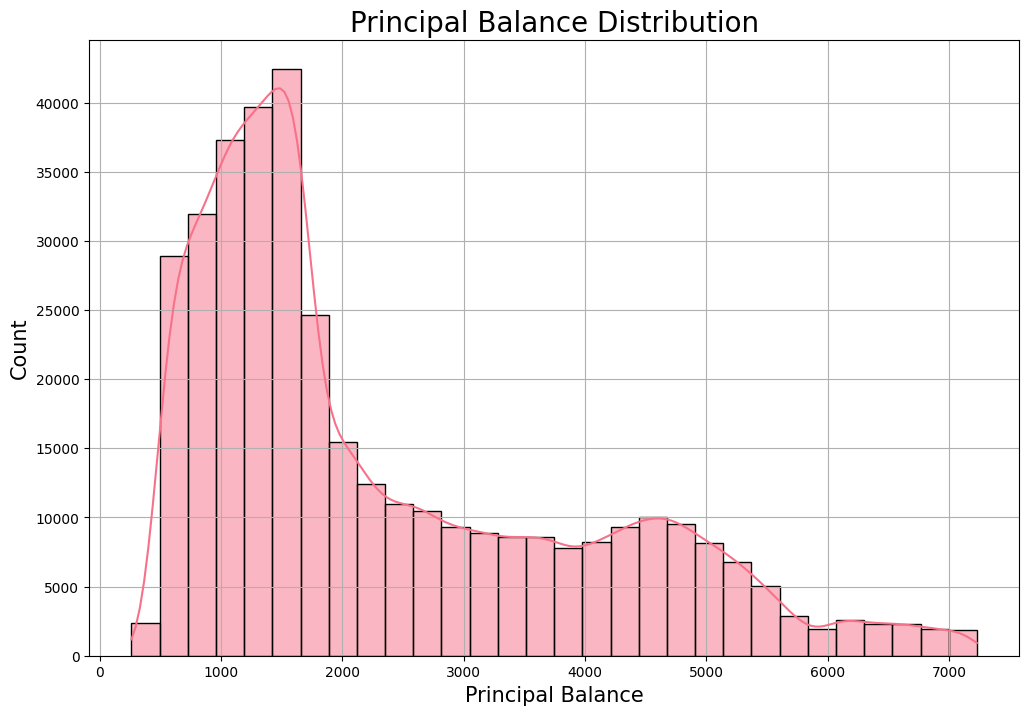

In [40]:
# plot principal balance of borrowers distribution if they have defaulted or not
fig = plt.figure(figsize=(12,8))
sns.histplot(df['PrincipalBalance'], bins=30, kde=True)
plt.title('Principal Balance Distribution', fontsize=20)
plt.xlabel('Principal Balance', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(True)
plt.show()
# principal balance is the amount of money borrowed but not yet paid back to the lender


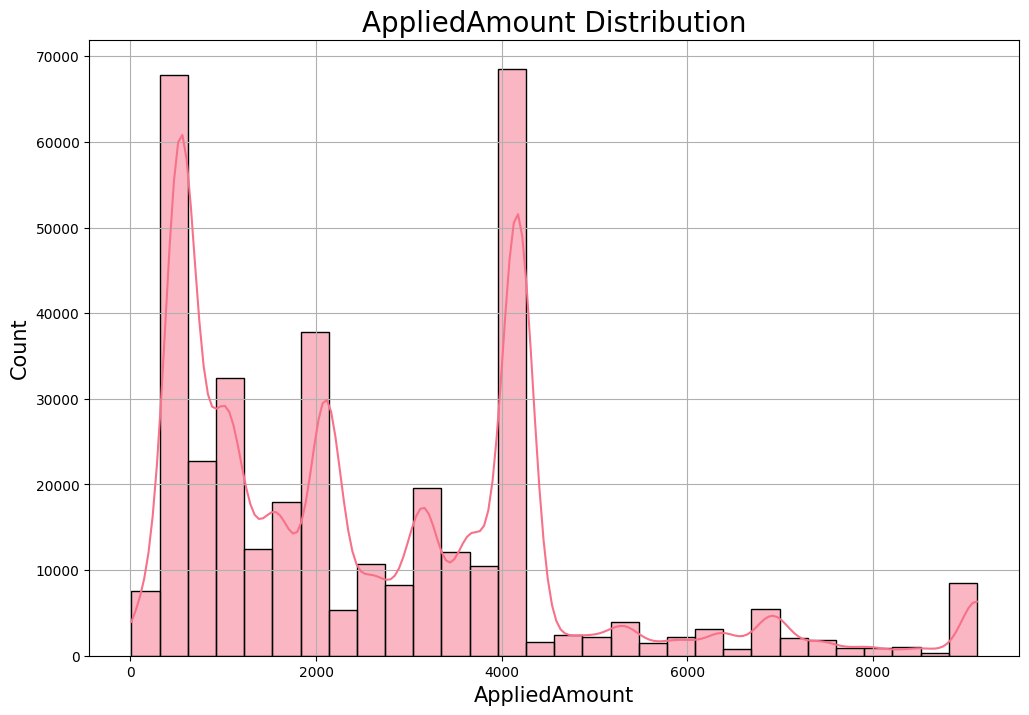

In [41]:
fig = plt.figure(figsize=(12,8))
sns.histplot(df['AppliedAmount'], bins=30, kde=True)
plt.title('AppliedAmount Distribution', fontsize=20)
plt.xlabel('AppliedAmount', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(True)
plt.show()

Text(0, 0.5, 'Loan Amount')

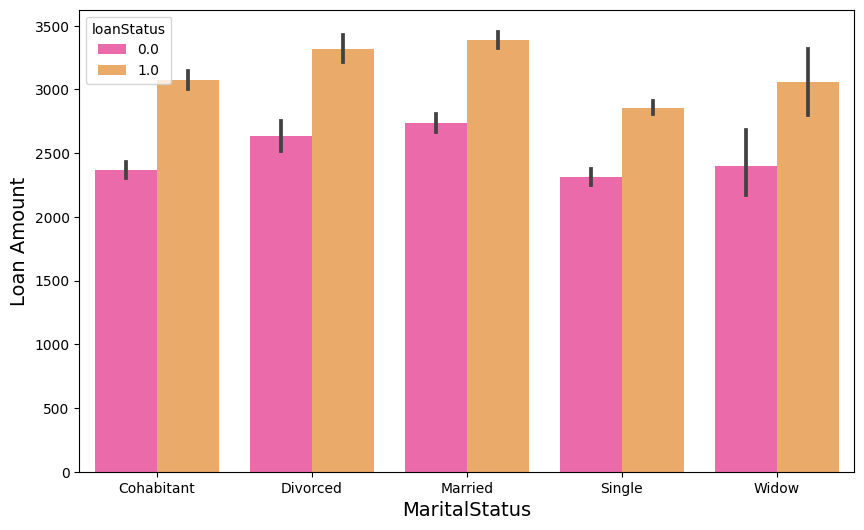

In [42]:
# Bar plot of Term (Loan taken for MaritalStatus)
plt.figure(figsize=(10,6))
sns.barplot(x="MaritalStatus",y= "AppliedAmount", data=df, palette='spring',hue='loanStatus')
plt.xlabel("MaritalStatus", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)

### reasonable as you are married the loan amount increase

In [43]:
df = df[df['Age'] != 4.0]

Text(0, 0.5, 'count')

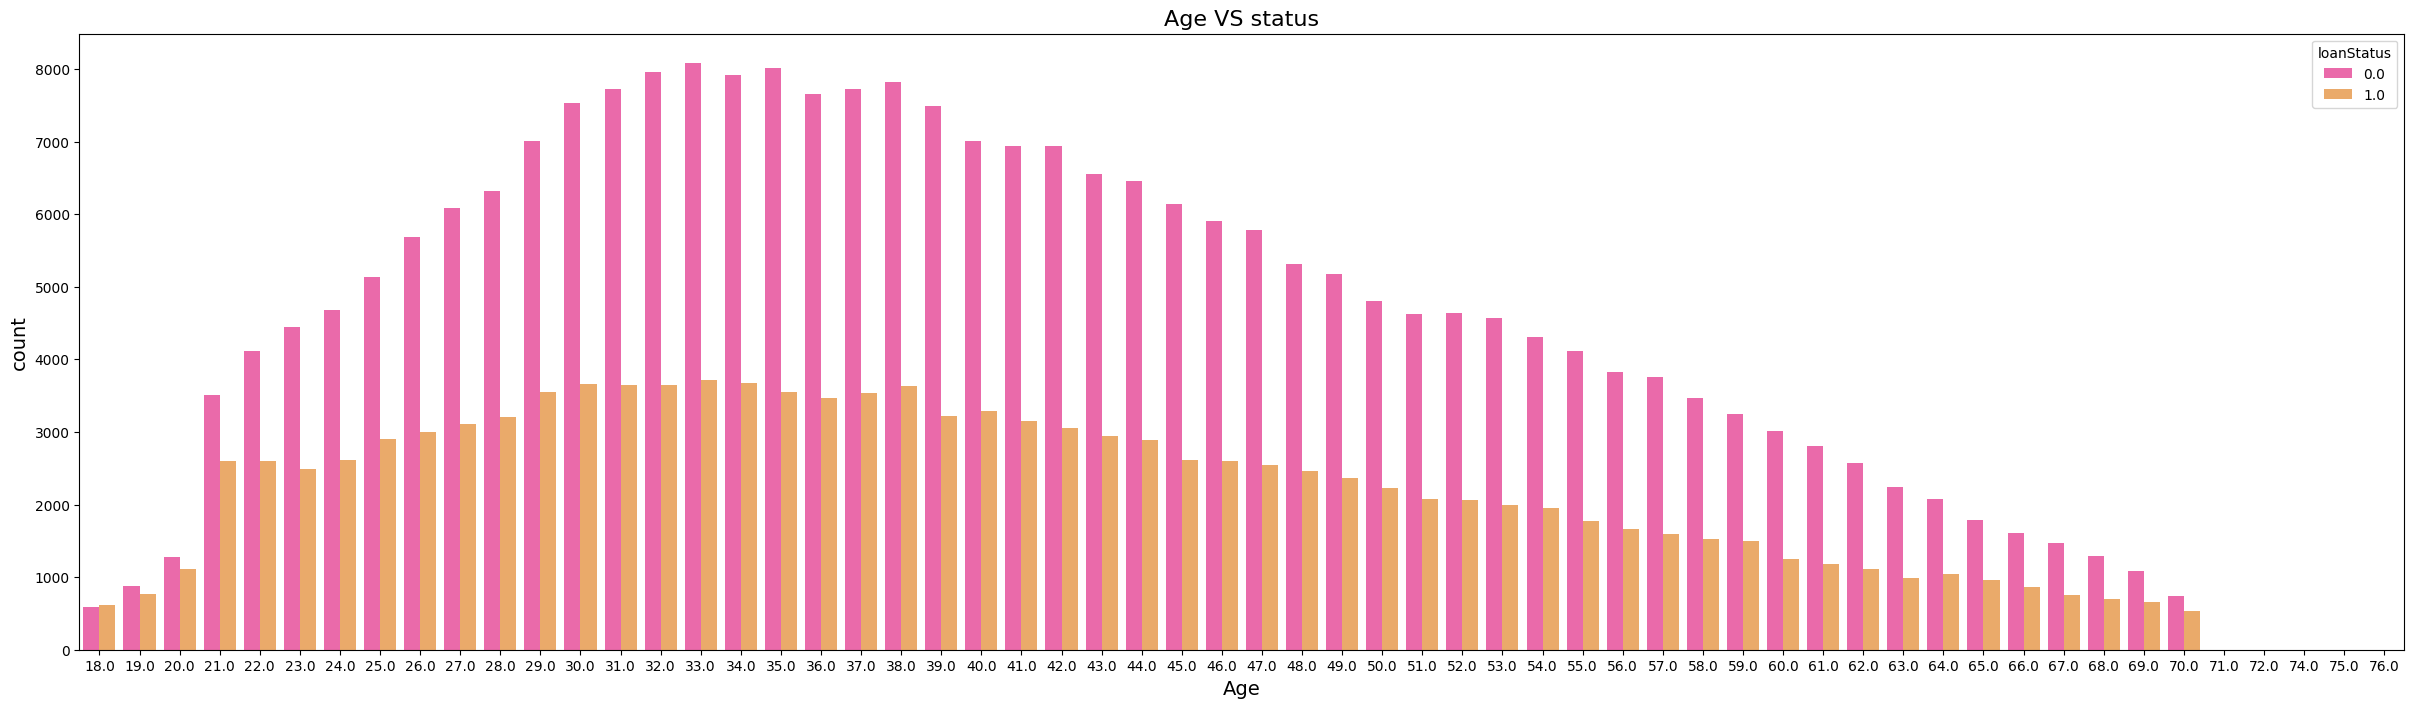

In [44]:
# Bar plot of Term (Loan taken for number of months)
plt.figure(figsize=(30,8))
sns.countplot(x="Age", data=df, palette='spring',hue='loanStatus')
plt.title("Age VS status", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("count",fontsize=14)

## normal distribution as being in age 25-45 is hig probably you will apply to a loan (starting a new business or something like that)

## Home Ownership Vs Age

Text(0, 0.5, 'count')

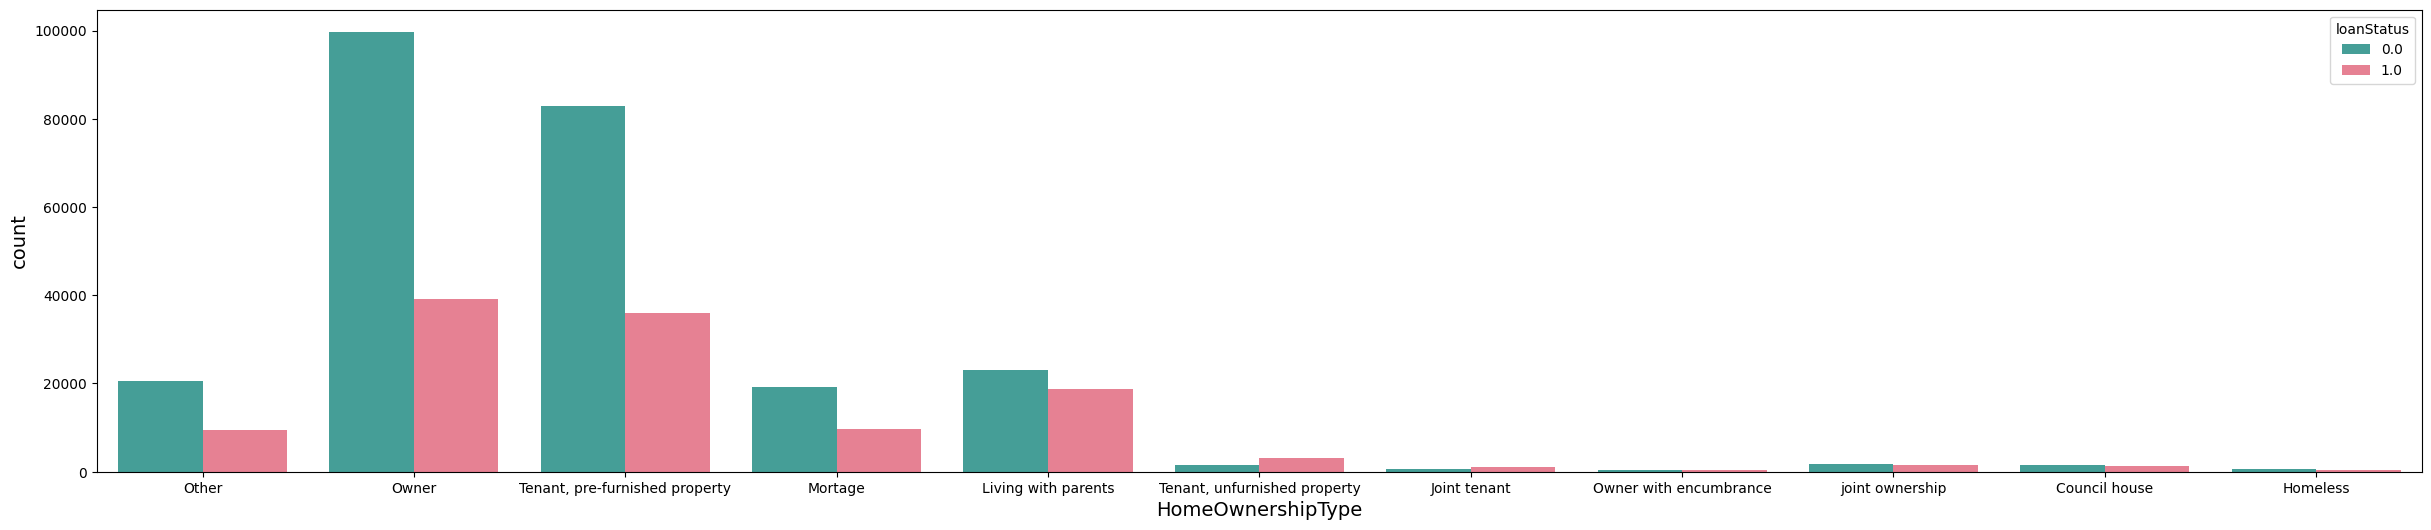

In [45]:

plt.figure(figsize=(30,6))
sns.countplot(x ="HomeOwnershipType", data=df,hue='loanStatus',palette=['C3','C6'])
plt.xlabel("HomeOwnershipType", fontsize=14)
plt.ylabel("count", fontsize=14)

# - lets answer some important Questions

## What are the key factors contributing to loan defaults? 

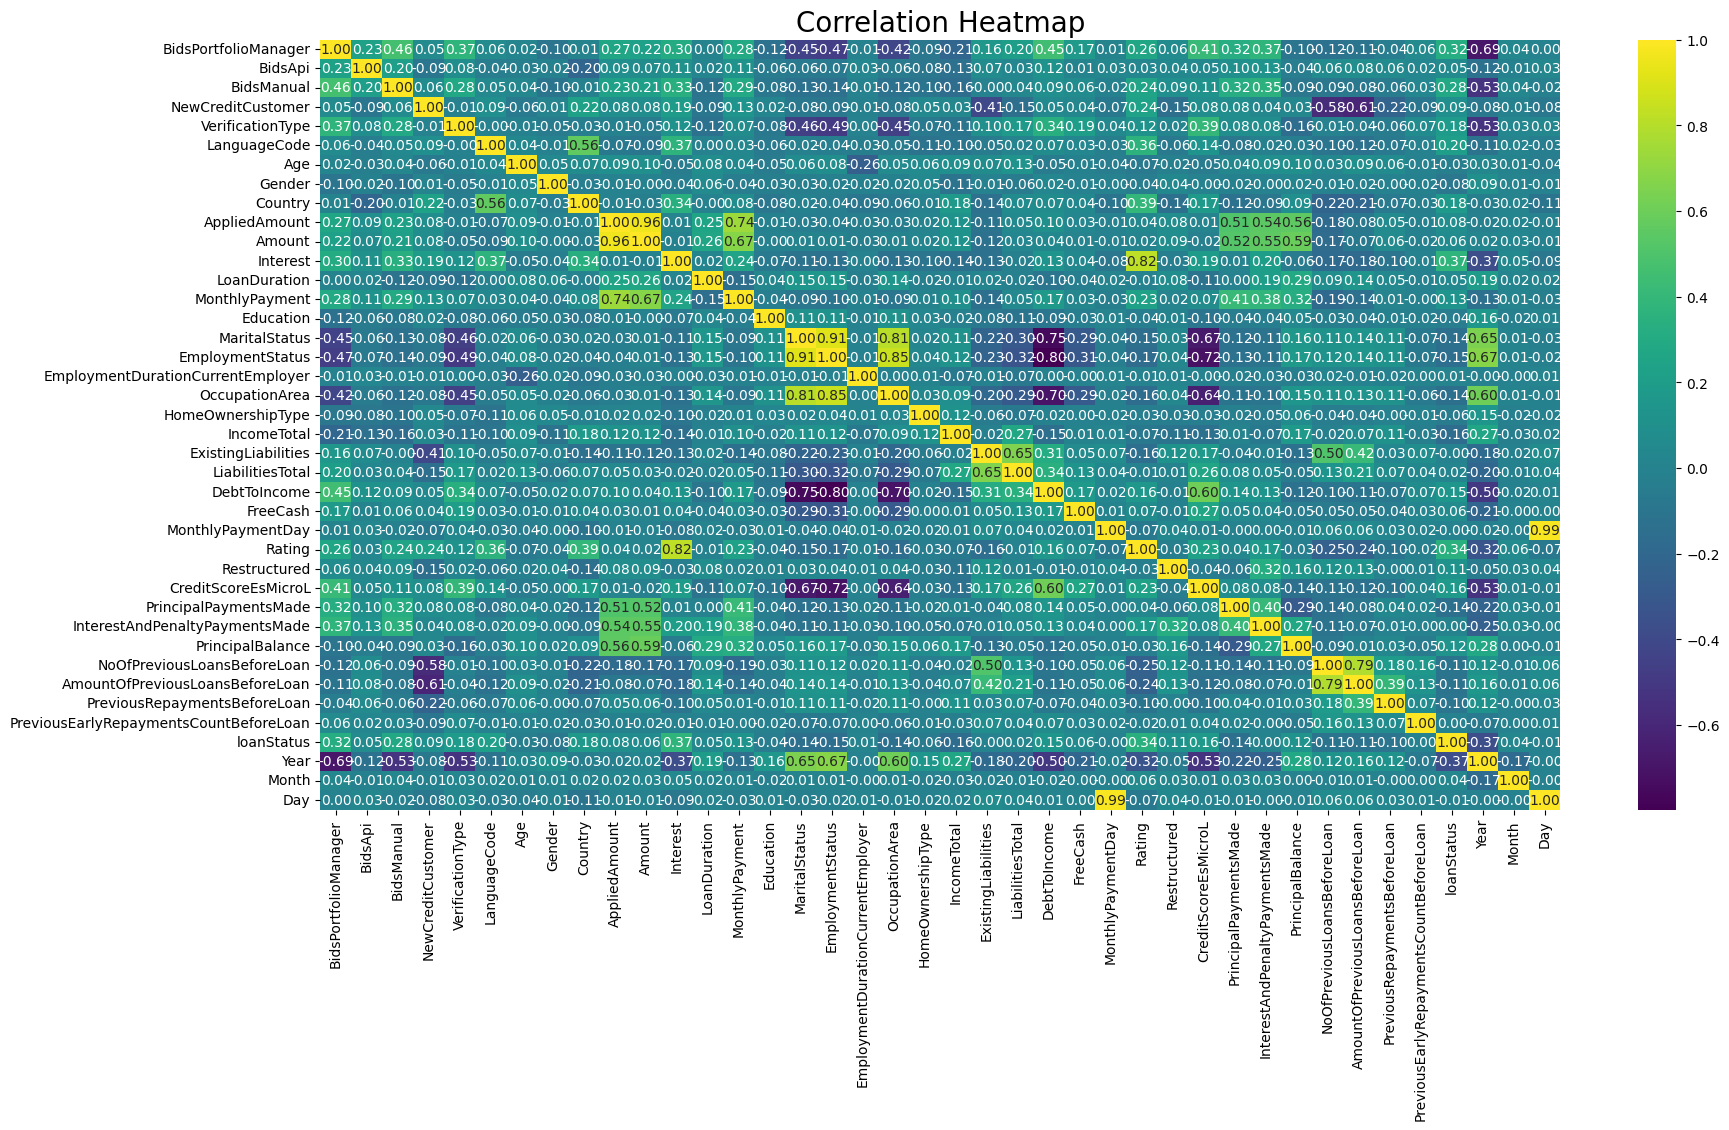

In [46]:
#  What are the key factors contributing to loan defaults? 
plt.figure(figsize=(20,10))
sns.heatmap(df_copy.corr(),annot=True,cmap='viridis',fmt='.2f')
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

#                                                                               Feature Engineering

- Cardinality

<Axes: >

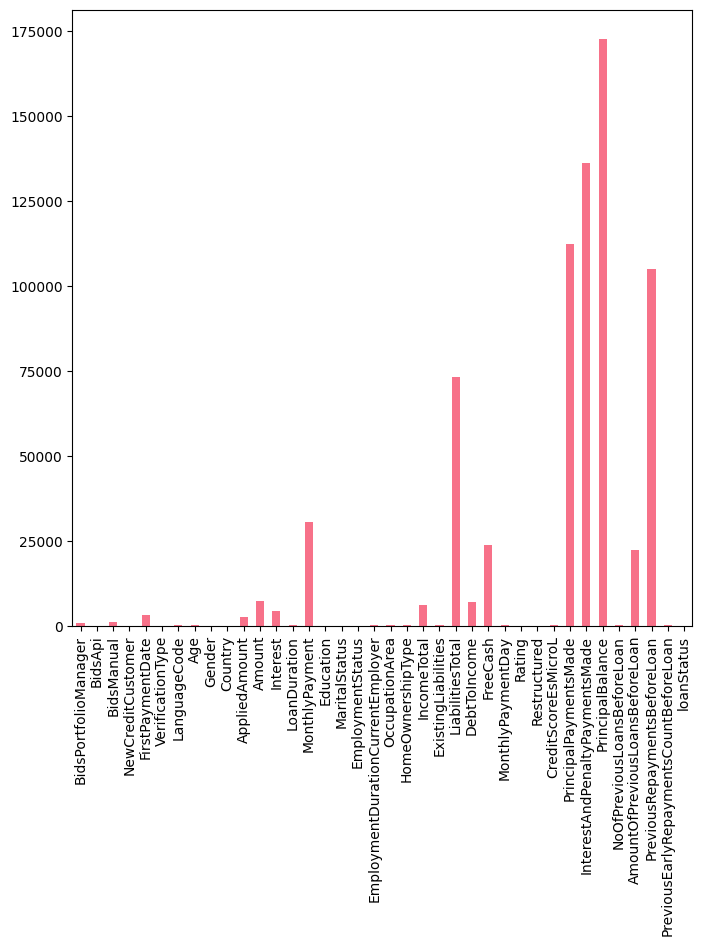

In [47]:
#define cardenality of each variable
df.nunique().plot.bar(figsize=(8,8))

In [48]:

X = df.copy()
y = X.pop("loanStatus")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# # All discrete features should now have integer dtypes (double-check this before using MI!)
# discrete_features = X.dtypes=='int64'

# remove nan values from X and reflect on y
X = X.fillna(X.mean())
y = y[X.index]
        

In [49]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores[::3]  # show a few features with their MI scores

PrincipalPaymentsMade                     0.150829
MonthlyPayment                            0.107554
BidsPortfolioManager                      0.082242
PreviousRepaymentsBeforeLoan              0.049062
Country                                   0.042476
LoanDuration                              0.019447
DebtToIncome                              0.015167
EmploymentStatus                          0.013128
OccupationArea                            0.011494
EmploymentDurationCurrentEmployer         0.009073
Restructured                              0.007021
BidsApi                                   0.002707
PreviousEarlyRepaymentsCountBeforeLoan    0.000000
Name: MI Scores, dtype: float64

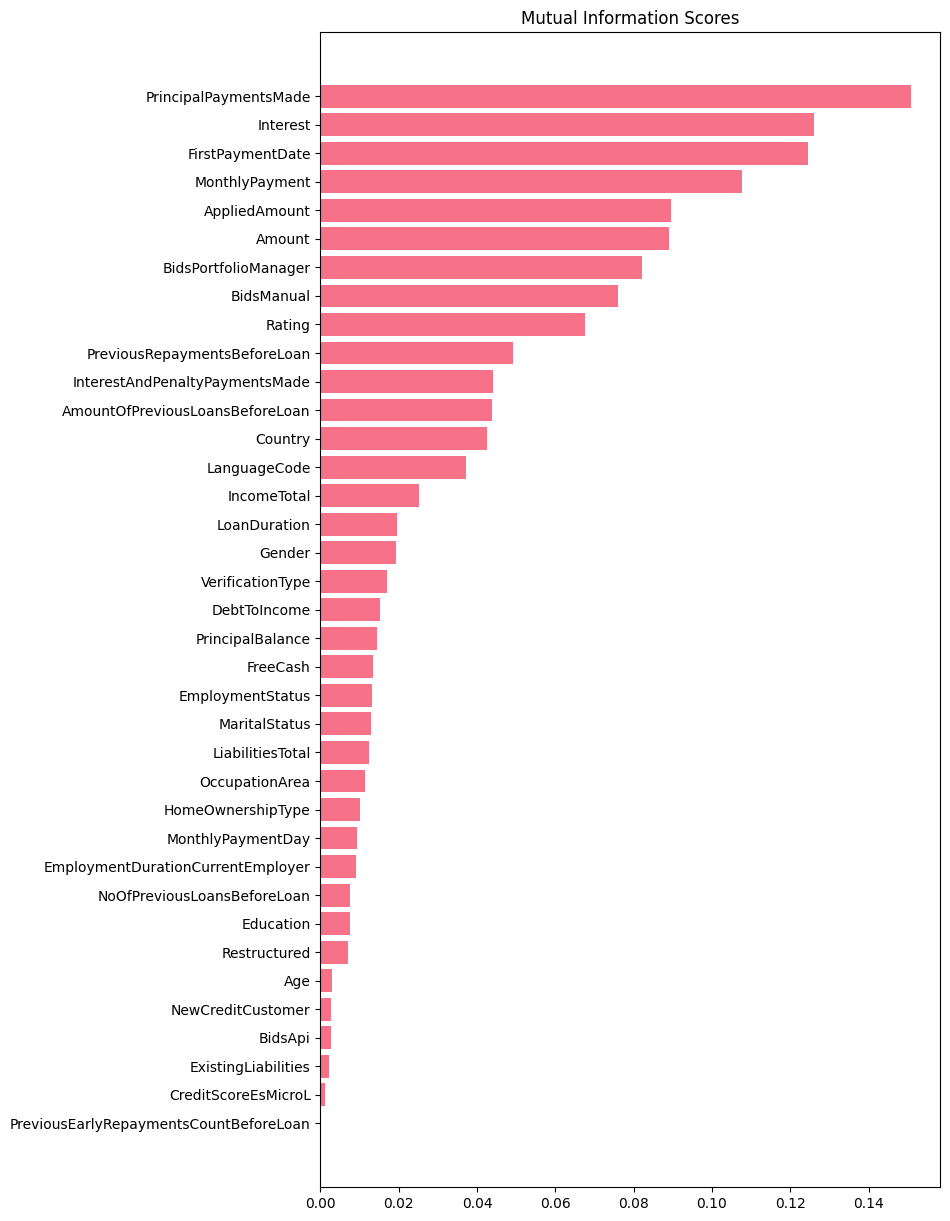

In [50]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 15))
plot_mi_scores(mi_scores)

## ExtraTreesClassifier method

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.06732533 0.01385231 0.05846154 0.00863167 0.06240369 0.01239468
 0.01706003 0.02103797 0.01966873 0.01973454 0.03066784 0.03303295
 0.07164741 0.01950556 0.02660017 0.01744319 0.00661678 0.00672561
 0.016949   0.00491534 0.01731343 0.02415765 0.01684589 0.01787271
 0.00448446 0.0029409  0.01997286 0.03097972 0.01934359 0.01694132
 0.11524166 0.07907126 0.05446987 0.01312501 0.01439951 0.01444675
 0.00371907]


<function matplotlib.pyplot.show(close=None, block=None)>

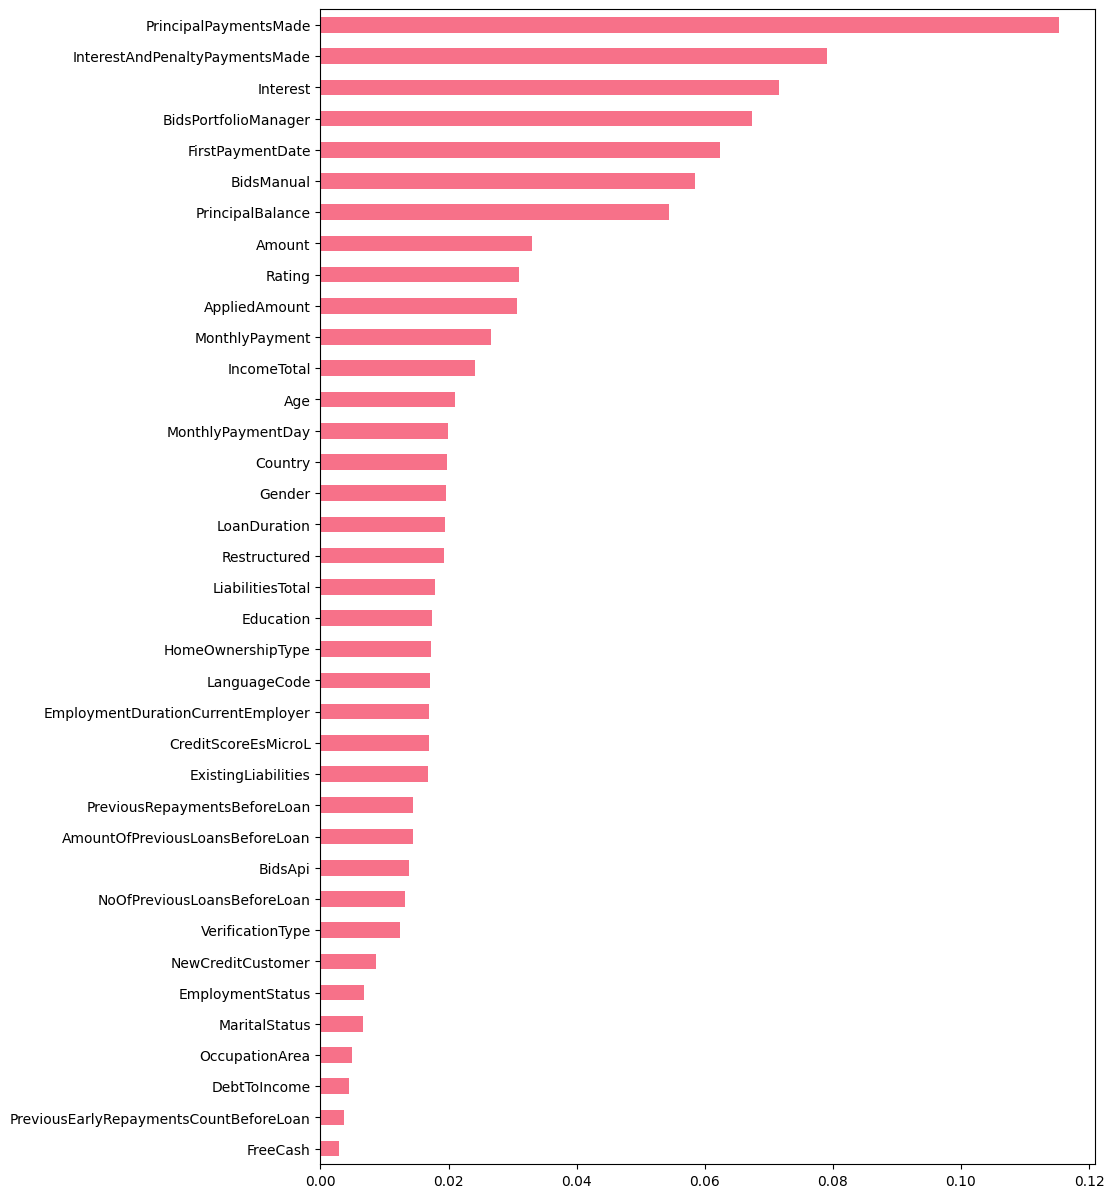

In [52]:
featureImportance=pd.Series(model.feature_importances_,index=X.columns)
plt.figure(dpi=100, figsize=(10, 15))

featureImportance.sort_values(ascending=True).plot(kind='barh')
plt.show

In [53]:
df.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'FirstPaymentDate', 'VerificationType', 'LanguageCode', 'Age', 'Gender',
       'Country', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration',
       'MonthlyPayment', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'Rating', 'Restructured', 'CreditScoreEsMicroL',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'loanStatus'],
      dtype='object')

### Time series analysis

Index([0.0, 1.0], dtype='float64', name='loanStatus')
Index(['2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09',
       '2009-10', '2009-11', '2009-12', '2010-01',
       ...
       '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
       '2024-01', '2024-02', '2024-03', '2024-04'],
      dtype='object', name='YearMonth', length=181)


<Figure size 4000x1000 with 0 Axes>

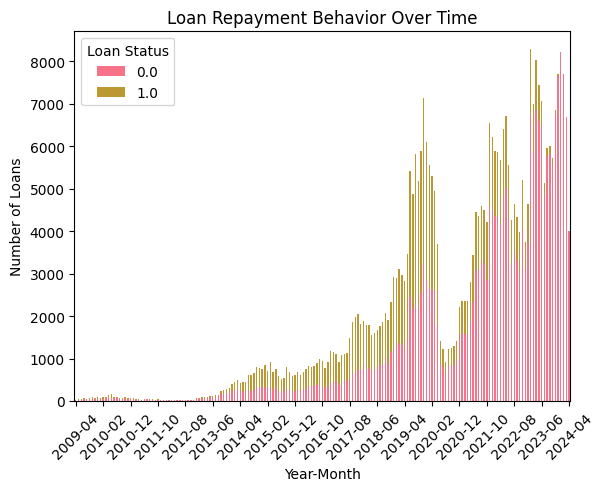

Index(['A', 'AA', 'B', 'C', 'D', 'E', 'F', 'HR'], dtype='object', name='Rating')


<Figure size 4000x2000 with 0 Axes>

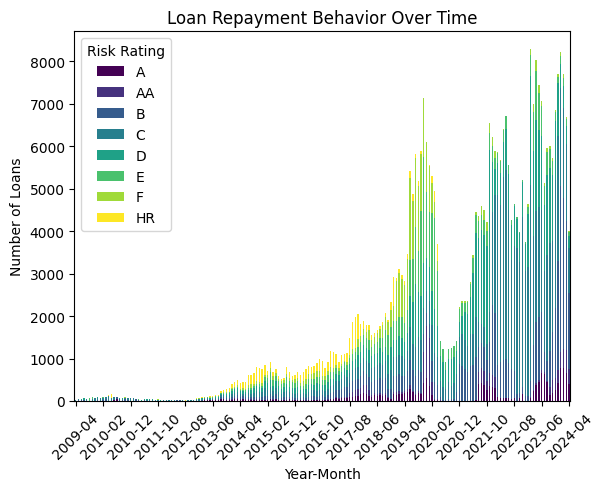

In [54]:
#  Are there specific patterns or trends in loan repayment behavior over time? 

# Convert 'FirstPaymentDate' to datetime format
df['FirstPaymentDate'] = pd.to_datetime(df['FirstPaymentDate'])

# Group data by month and calculate loan repayment metrics
df['YearMonth'] = df['FirstPaymentDate'].dt.to_period('M')
repayment_summary = df.groupby(['YearMonth', 'loanStatus']).size().unstack(fill_value=0)

# Check if 'loanStatus' contains the desired categories
print(repayment_summary.columns)

# Plot loan repayment behavior over time
plt.figure(figsize=(40, 10))
repayment_summary.plot(kind='bar', stacked=True)
plt.title('Loan Repayment Behavior Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Loans')

dates = repayment_summary.index.strftime('%Y-%m')

print(dates)

# skip 10 dates to avoid overlapping
plt.xticks(range(0, len(dates), 10), dates[::10], rotation=45)

plt.legend(title='Loan Status')

plt.show()


# relate repayment_summary with risk rating

# Group data by month and calculate loan repayment metrics
repayment_summary = df.groupby(['YearMonth', 'Rating']).size().unstack(fill_value=0)

# Check if 'loanStatus' contains the desired categories
print(repayment_summary.columns)

# Plot loan repayment behavior over time
plt.figure(figsize=(40, 20))
repayment_summary.plot(kind='bar', stacked=True,colormap='viridis')
plt.title('Loan Repayment Behavior Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Loans')

dates = repayment_summary.index.strftime('%Y-%m')
plt.xticks(range(0, len(dates), 10), dates[::10], rotation=45)

plt.legend(title='Risk Rating')


plt.show()





In [55]:
'''
Defaulted Loan: If the loan status indicates that the loan is defaulted, 
it means that the borrower has failed to meet their repayment obligations according to the terms of the loan agreement.
This could include missing payments, making late payments, or failing to repay the loan in full by the specified deadline.
Defaulted loans represent negative repayment behavior, indicating a higher risk of financial loss to the lender.

Not Defaulted Loan: Conversely, if the loan status indicates that the loan is not defaulted, it means that the borrower is meeting their
repayment obligations as agreed. This includes making payments on time and in full, adhering to the repayment schedule outlined in the loan agreement.
Non-defaulted loans reflect positive repayment behavior and lower credit risk for the lender.
'''

'\nDefaulted Loan: If the loan status indicates that the loan is defaulted, \nit means that the borrower has failed to meet their repayment obligations according to the terms of the loan agreement.\nThis could include missing payments, making late payments, or failing to repay the loan in full by the specified deadline.\nDefaulted loans represent negative repayment behavior, indicating a higher risk of financial loss to the lender.\n\nNot Defaulted Loan: Conversely, if the loan status indicates that the loan is not defaulted, it means that the borrower is meeting their\nrepayment obligations as agreed. This includes making payments on time and in full, adhering to the repayment schedule outlined in the loan agreement.\nNon-defaulted loans reflect positive repayment behavior and lower credit risk for the lender.\n'

In [56]:
# print null percentages
print(df.isnull().mean() * 100)

BidsPortfolioManager                       0.000000
BidsApi                                    0.000000
BidsManual                                 0.000000
NewCreditCustomer                          0.000000
FirstPaymentDate                           0.000000
VerificationType                           0.000000
LanguageCode                               0.000000
Age                                        0.000000
Gender                                     0.000000
Country                                    0.000000
AppliedAmount                              0.000000
Amount                                     0.000000
Interest                                   0.000000
LoanDuration                               0.000000
MonthlyPayment                             0.000000
Education                                  0.000000
MaritalStatus                             90.192973
EmploymentStatus                          90.240223
EmploymentDurationCurrentEmployer          0.000000
OccupationAr

In [57]:
# lets process data after EDA step

#drop day,year columns
df= df.drop(['MonthlyPaymentDay','FirstPaymentDate'],axis=1)

In [58]:
df.shape

(372488, 37)

In [59]:
# save the cleaned data
df.to_csv('dataset/cleaned_data.csv',index=False)

In [60]:
df.shape

(372488, 37)

In [61]:
df.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'VerificationType', 'LanguageCode', 'Age', 'Gender', 'Country',
       'AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'DebtToIncome', 'FreeCash', 'Rating',
       'Restructured', 'CreditScoreEsMicroL', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'loanStatus', 'YearMonth'],
      dtype='object')